# **IMDB text classification**

# Summarize the basic workflow of training models as follows:

Training and Fine-tuning Workflow:

1. Define the task  

2. Validation recipe  

3. Measure of success  

4. Training structure:

>4.1. Prepare dataset  

>4.2. Evaluation:  
    >>4.2.1 Divide dataset  
    4.2.2 Data representation  
    4.2.3 The time arrow of time  
    4.2.4 Redundancy in data  

5. Beat a baseline.  

6. Develop an overfitting model:  


> 6.1. Model without overfitting:  
    >>6.1.1. Scale up: Develop a model that overfits  
      >>>a. Add layers  
      b. Make the layers bigger  
      c. More epochs  

>6.2. Model with overfitting:  
    >>6.2.1. Improving model fit (fine tuning strategy):   
    >>>a. Optimize learning rate  
    b. Increasing model capacity:  
    >>>>i. Add layers  
    ii. Increase batch size    
    iii. Train for more epochs  

7. Improving generalization:

>7.1 Dataset curation  

>7.2 Feature engineering  

>7.3 Using early stopping  

>7.4 Regularizing your model  

>>7.4.1 Reducing the network's size  
>>7.4.2 Adding weight regularization  
>>7.4.3 Adding Dropout  

8. Advanced tuning:  

>8-1 Use mse as Loss Function instead  

>8-2 Use tanh as Activate Function instead  

>8-3 Add dense layer  

>8-4 Increase or decrease neurons  

9. Final test model  

10. Conclusion  

>Training Model Evaluation Criteria:  
Generalization  
Overfitting  
Model Fit  

11. Further test

12. Referencs  



---------------





# 1. Define the task
The untimate goal of machine learning is to generalize the model and apply it to unseen data so that it can predict the future  as well as possible. The target of this research is training a model that can classifying movie reviews, positive or negative, by binary classification.

# 2. Dataset chosen(validation recipe)
The IMDB (Internet Movie Database) dataset is a public dataset widely used in machine learning and natural language processing, especially in sentiment analysis tasks.

It is mainly used for binary sentiment classification tasks, determining whether a movie review, which are written by real users, is positive or negative. The dataset contains 50,000 reviews, split into a training set and a test set of 25,000 reviews each and each review is tagged as "positive" or "negative." The number of both sides reviews is approximately equal.

From Keras.io: "Words are indexed by overall frequency in the dataset, so that for instance the integer "3" encodes the 3rd most frequent word in the data. This allows for quick filtering operations such as: "only consider the top 10,000 most common words, but eliminate the top 20 most common words"."

In [2]:
# Codes are original from Jérémie's lecture and generated ChatGPT (ver. Plugins).
# Import statements
# Dataset
from tensorflow.keras.datasets import imdb

# System
import os
import gc
import sys
import time
import traceback

# Data processing
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd

# Regularizations
from tensorflow.keras import models, layers, losses, optimizers, regularizers
from tensorflow.keras.callbacks import EarlyStopping

#### A negative review  
##### # Codes originally from CW 1 example.

In [ ]:
# Codes are original from Jérémie's lecture and generated ChatGPT (ver. Plugins).

# Load the dataset
((train_data, train_labels), (test_data, test_labels)) = tf.keras.datasets.imdb.load_data(num_words=10000)

# Print the shapes
print("Train data shape:", train_data.shape)
print("Test data shape:", test_data.shape)


Train data shape: (25000,)
Test data shape: (25000,)


In [ ]:
print(train_data[100]) # how a text looks like: a list of numbers!

[1, 13, 244, 6, 87, 337, 7, 628, 2219, 5, 28, 285, 15, 240, 93, 23, 288, 549, 18, 1455, 673, 4, 241, 534, 3635, 8448, 20, 38, 54, 13, 258, 46, 44, 14, 13, 1241, 7258, 12, 5, 5, 51, 9, 14, 45, 6, 762, 7, 2, 1309, 328, 5, 428, 2473, 15, 26, 1292, 5, 3939, 6728, 5, 1960, 279, 13, 92, 124, 803, 52, 21, 279, 14, 9, 43, 6, 762, 7, 595, 15, 16, 2, 23, 4, 1071, 467, 4, 403, 7, 628, 2219, 8, 97, 6, 171, 3596, 99, 387, 72, 97, 12, 788, 15, 13, 161, 459, 44, 4, 3939, 1101, 173, 21, 69, 8, 401, 2, 4, 481, 88, 61, 4731, 238, 28, 32, 11, 32, 14, 9, 6, 545, 1332, 766, 5, 203, 73, 28, 43, 77, 317, 11, 4, 2, 953, 270, 17, 6, 3616, 13, 545, 386, 25, 92, 1142, 129, 278, 23, 14, 241, 46, 7, 158]


#### A negative review  
##### # Codes originally from CW 1 example.

In [ ]:
word_index = tf.keras.datasets.imdb.get_word_index()                   # get words → index
reverse_word_index = {value:key for key,value in word_index.items()}   # reverse: index → word (Python dict comprehension)
decoded_review = ' '.join(
    [                                      # get() works like [] but you can set a default
        reverse_word_index.get(i - 3, '?') # value if the key isn't found -3 because the first
        for i in train_data[100]           # three slots in the vocab are 0: "padding",
    ]                                      #                              1: "start of sequence",
)                                          #                              2: "unknown"

1641221/1641221 [==============================] - 0s 0us/step


In [ ]:
print(decoded_review)

? i am a great fan of david lynch and have everything that he's made on dvd except for hotel room the 2 hour twin peaks movie so when i found out about this i immediately grabbed it and and what is this it's a bunch of ? drawn black and white cartoons that are loud and foul mouthed and unfunny maybe i don't know what's good but maybe this is just a bunch of crap that was ? on the public under the name of david lynch to make a few bucks too let me make it clear that i didn't care about the foul language part but had to keep ? the sound because my neighbors might have all in all this is a highly disappointing release and may well have just been left in the ? box set as a curiosity i highly recommend you don't spend your money on this 2 out of 10


In [ ]:
print(train_labels[100]) # 0: negative

0


#### A positive review
##### # Codes come from CW 1 example.

The question marks are in place of words outside the 10000 word dictionary.

In [ ]:
# let's try another one
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[83]])
print(decoded_review, '\n\nlabel: ', train_labels[83])

? the biggest reason i had to see this movie was that it stars susan swift an outstanding and all too ? actress time travel movies usually don't interest me and neither do movies about witchcraft but this movie was fascinating and creepy it didn't rely on outrageous special effects and it didn't focus so heavily on the time travel that the viewer gets lost and confused this was a really creative movie kept simple and focused with great acting by all 

label:  1


In [ ]:
# Codes below are generated by ChatGPT Plugins

# download data: top 10000 most frequent words only, discard rare words
(train_data, train_labels), (test_data, test_labels) = tf.keras.datasets.imdb.load_data(num_words=10000)

# Print the shape of training and test data
print(train_data.shape, test_data.shape)

# Combine training and test labels to count the entire data set
all_labels = np.concatenate((train_labels, test_labels))

# Count the number of positive and negative comments
positive_reviews = np.sum(all_labels == 1)
negative_reviews = np.sum(all_labels == 0)

# Print the number of positive and negative comments
print(f"Number of positive reviews: {positive_reviews}")
print(f"Number of negative reviews: {negative_reviews}")

(25000,) (25000,)
Number of positive reviews: 25000
Number of negative reviews: 25000


# 3. Measure of success, and 4. Training structures.

At the first, we are going to divide our dataset into training set, validation set, and test sest. the first evaluation metric is our model can achieve over 50% accuracy on the validation set. After that, we aim to develop an overfitting model. Once our the model are able to be overfitting, the next step is improving model fit, including adjust learning rate, introduce weight regularization, and increasing model capacity.

### Training evaluation

The following code is to reduce the uncertainty caused by random number generation when using TensorFlow and NumPy so that the results of tuning or model training can be better reproducibility. This means that only error information will be printed and warning and information logs will not be displayed. By doing so, we can reduce console information redundancy, focusing more on training and critical error information.

In [3]:
# Codes are from Jérémie's course "04.1.classifying-movie-reviews-imdb".

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
tf.random.set_seed(23)
np.random.seed(23)

## Data Preprocess

### Multi-hot encoding  
Convert a sequence of integers to one-hot encoding so that we can convert words or tokens into a numerical form(binary matrices) that can be processed by a neural network. Suitable for processing large number of categories but each instance belongs to only one category.

In [4]:
# Codes below are from Dr.Jérémie's course "04.1.classifying-movie-reviews-imdb".

# Load IMDB dataset
(train_data, train_labels), (test_data, test_labels) = tf.keras.datasets.imdb.load_data(num_words=10000)

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.0
    return results

# Preprocess dataset
# Vectorization process on the training data and test data, ensuring consistency in the format and processing.
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

# Simple holdout validation: Spilit dataset into train set and validation set
partial_x_train = x_train[10000:]
partial_y_train = y_train[10000:]
x_val = x_train[:10000]
y_val = y_train[:10000]

### Split dataset into training, validation, and test set.

In [5]:
# Codes below are from W.Jérémie's course "04.1.classifying-movie-reviews-imdb".
# Calculate proportions of parts(by ChatGPT Plugins)
total_samples = len(x_train) + len(x_test)
train_ratio = len(partial_x_train) / total_samples
val_ratio = len(x_val) / total_samples
test_ratio = len(x_test) / total_samples

# Codes below are generated by ChatGPT Plugins
print(f"Training set ratio: {train_ratio:.2f}")
print(f"Validation set ratio: {val_ratio:.2f}")
print(f"Test set ratio: {test_ratio:.2f}")

Training set ratio: 0.30
Validation set ratio: 0.20
Test set ratio: 0.50


### Training History

In [6]:
# Codes are original from Jérémie's "lab-3-IMDB". Modified by ChatGPT(ver. Plugins).
# Use for training the model multiple times, comparing different training runs, and tuning hyperparameters.

def train_and_save_history(model, x_train, y_train, x_val, y_val, epochs, batch_size, all_histories, callbacks=None):
    history = model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(x_val, y_val), callbacks=callbacks)
    all_histories.append(history.history)
    return history.history

### Plot History

In [7]:
# Codes are original from Jérémie's "lab-3-IMDB". Modified by ChatGPT(ver. Plugins).
# Prompts included "Help me optimise the chart" and "Change the dot color", but I have to provide the "Training History" function code, "Model" function code, and "Metric Dataframe" function code, or the variable will be randomly named by ChatGPT (it's a disaster).

def plot_history(history):
    acc = history['accuracy']
    val_acc = history['val_accuracy']
    loss = history['loss']
    val_loss = history['val_loss']
    epochs = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss, 'ro-', label='Training loss')  # 训练损失的红色点和实线
    plt.plot(epochs, val_loss, 'bo-', label='Validation loss')  # 验证损失的蓝色点和实线
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs, acc, 'ro-', label='Training acc')  # 训练准确率的红色点和实线
    plt.plot(epochs, val_acc, 'bo-', label='Validation acc')  # 验证准确率的蓝色点和实线
    plt.title('Training and validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()


## Metric Dataframe

In [8]:
# Idea originally from CW 1 example. Modified by ChatGPT(ver. Plugins).
# Codes are generated together with the "Main function" function, "Model" function, and "Training History" function by ChatGPT (ver. Plugins).

def generate_performance_dataframe(model: tf.keras.Model, history: dict) -> pd.DataFrame:
    
    model_name = model.name if model.name else 'Unnamed Model'
    num_layers = len(model.layers)

    # first dense units
    units = model.layers[0].units

    # Initialize regularization and dropout rate
    l1_reg = None
    l2_reg = None
    dropout_rate = None

    # Traverse each layer to extract L1, L2 regularization parameters and dropout rate
    for layer in model.layers:
        if hasattr(layer, 'rate'):
            dropout_rate = layer.rate
        if hasattr(layer, 'kernel_regularizer') and layer.kernel_regularizer is not None:
            regularizer = layer.kernel_regularizer.get_config()
            l1_reg = regularizer.get('l1')
            l2_reg = regularizer.get('l2')

    # Optimizer configuration
    optimizer_config = model.optimizer.get_config()
    learning_rate = optimizer_config.get('learning_rate')
    momentum = optimizer_config.get('momentum', None)

    # Extract minimum verification loss and maximum verification accuracy from historical dictionary
    min_val_loss_value = np.min(history['val_loss'])
    max_val_acc_value = np.max(history['val_accuracy'])

    # Create a DataFrame containing actual model performance metrics
    data = {
        'Model': [model_name],
        'Layers': [num_layers],
        'Units': [units],
        'LR': [learning_rate],
        'Momentum': [momentum],
        'L1': [l1_reg],
        'L2': [l2_reg],
        'Dropout': [dropout_rate],
        'Min.V.Loss': [min_val_loss_value],
        'Max.V.Acc': [max_val_acc_value]
    }

    df = pd.DataFrame(data)

    return df


## Clean memory

In [9]:
# Codes are original from Jérémie's lecture "04.1.classifying-movie-reviews-imdb".
# Memory clean-up for Jupyter
# Slightly modified from fast.ai utils: https://github.com/fastai/course22p2/blob/df9323235bc395b5c2f58a3d08b83761947b9b93/miniai/init.py#L31

def clean_ipython_hist():
    # Code in this function mainly copied from IPython source
    if not 'get_ipython' in globals(): return
    ip = get_ipython()
    user_ns = ip.user_ns
    ip.displayhook.flush()
    pc = ip.displayhook.prompt_count + 1
    for n in range(1, pc): user_ns.pop('_i'+repr(n),None)
    user_ns.update(dict(_i='',_ii='',_iii=''))
    hm = ip.history_manager
    hm.input_hist_parsed[:] = [''] * pc
    hm.input_hist_raw[:] = [''] * pc
    hm._i = hm._ii = hm._iii = hm._i00 =  ''

def clean_tb():
    # h/t Piotr Czapla
    if hasattr(sys, 'last_traceback'):
        traceback.clear_frames(sys.last_traceback)
        delattr(sys, 'last_traceback')
    if hasattr(sys, 'last_type'): delattr(sys, 'last_type')
    if hasattr(sys, 'last_value'): delattr(sys, 'last_value')

def clean_mem():
    clean_tb()
    clean_ipython_hist()
    gc.collect()
    tf.keras.backend.clear_session()
    time.sleep(2)

## Main function

In [10]:
# Codes are generated together with the "Metrics DataFrame" function, "Model" function, and "Training History" function by ChatGPT (ver. Plugins).
# Keep track of the training process and results of various models.

# main function
if __name__ == "__main__":
    all_histories = [] # save all training history data in lists
    models = {} # save all models and history data

According to the principle of Occam’s razor: Given two explanations for something, the explanation most likely to be correct is the simplest one—the one that makes fewer assumptions. We start with the simplest model.

# 5. Beat the baseline, and 6. Develop an overfitting model:  

## # All models' codes are original from Jérémie's lectures and lab. Modified by ChatGPT (ver. Plugins), during 5/11-12/11.

# Model_01:
lyers=2  
epochs=20  
batch_size=256

Epoch 1/20
59/59 [==============================] - 4s 51ms/step - loss: 0.5195 - accuracy: 0.8091 - val_loss: 0.4218 - val_accuracy: 0.8579
Epoch 2/20
59/59 [==============================] - 1s 16ms/step - loss: 0.3511 - accuracy: 0.8903 - val_loss: 0.3398 - val_accuracy: 0.8798
Epoch 3/20
59/59 [==============================] - 1s 13ms/step - loss: 0.2770 - accuracy: 0.9129 - val_loss: 0.3085 - val_accuracy: 0.8830
Epoch 4/20
59/59 [==============================] - 1s 13ms/step - loss: 0.2328 - accuracy: 0.9267 - val_loss: 0.2915 - val_accuracy: 0.8871
Epoch 5/20
59/59 [==============================] - 1s 13ms/step - loss: 0.2027 - accuracy: 0.9364 - val_loss: 0.2811 - val_accuracy: 0.8867
Epoch 6/20
59/59 [==============================] - 1s 13ms/step - loss: 0.1796 - accuracy: 0.9437 - val_loss: 0.2721 - val_accuracy: 0.8906
Epoch 7/20
59/59 [==============================] - 1s 11ms/step - loss: 0.1612 - accuracy: 0.9505 - val_loss: 0.2724 - val_accuracy: 0.8892
Epoch 8/20
59

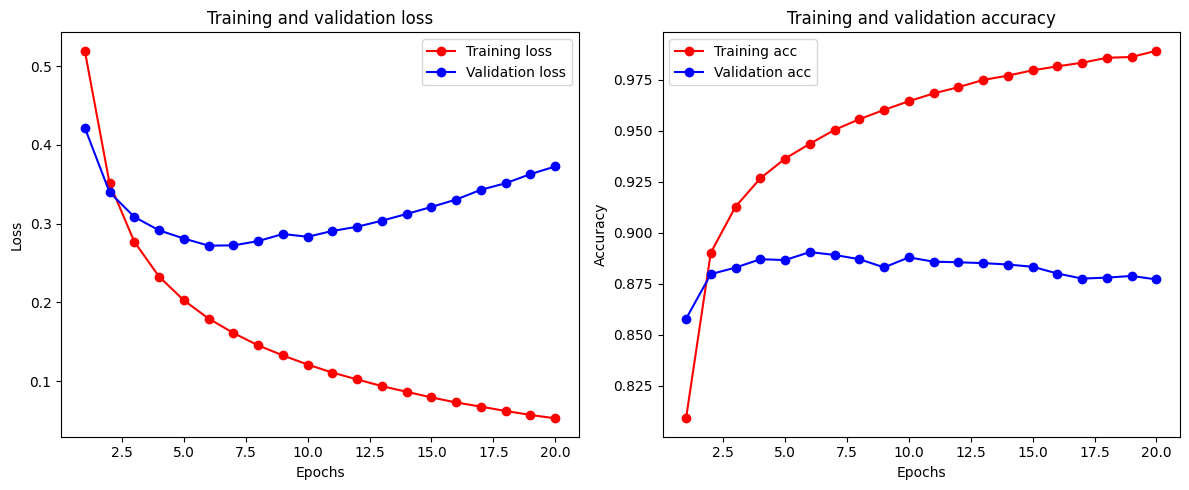

In [ ]:
# Define model
model = tf.keras.models.Sequential([
tf.keras.layers.Dense(4, activation='relu', input_shape=(10000,)),
tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile model
model.compile(optimizer=optimizers.RMSprop(learning_rate=0.001),
              loss=losses.binary_crossentropy,
              metrics=['accuracy'])

# Train model and store history
history = train_and_save_history(model, partial_x_train, partial_y_train, x_val, y_val, 20, 256, all_histories)

# Evaluate model performance
results = model.evaluate(x_test, y_test)
print(f"Test Loss: {results[0]}, Test Accuracy: {results[1]}")

# Plot both training and validation loss and accuracy of the last training
plot_history(all_histories[-1])

# Performance_Model_01:

In [ ]:
df = generate_performance_dataframe(model, history)
print(df)

clean_mem()

          Model  Layers  Units     LR  mom    L1    L2 Dropout  Min.V.Loss  \
0  sequential_2       2      4  0.001  0.0  None  None    None    0.272096   

   Max.V.Acc  
0     0.8906  


# Model_01 Summary:  
From the above plot, we can observe that the training set accuracy value and loss value are getting better during the training period. However, the validation set accuracy reach the highest at epoch 6(0.8906) and minimum loss 0.272166 at epoch 5, but following by the increasing loss and oscillate back and forth on the accuracy. Due to the validation accuracy value outrun the baseline(50%), we can also infer that the representational power is enough. The model gets better on the training data, but stops improving on the unseen validation data, representing that it is a little bit overfitting.  

# Following adjustment strategies:  
Since our model is capable of overfitting, we decide to perform further adjustment.  
Aim: Find a model that beats the validation accuracy value 0.8910, or beat overall training performance(Test Loss: 0.4139, Test Accuracy: 0.8650).  
Method: We modify only one hyperparameter at one time till we find a satisified model.  
Steps:  
1. add 1 more layer  
2. higher and lower Learning rate

# Model_02
layers=3 (add 1 more here)  
epochs=20  
batch_size=256

Epoch 1/20
59/59 [==============================] - 3s 47ms/step - loss: 0.5818 - accuracy: 0.7403 - val_loss: 0.5293 - val_accuracy: 0.8461
Epoch 2/20
59/59 [==============================] - 2s 32ms/step - loss: 0.4769 - accuracy: 0.8577 - val_loss: 0.4877 - val_accuracy: 0.8758
Epoch 3/20
59/59 [==============================] - 2s 29ms/step - loss: 0.4304 - accuracy: 0.8984 - val_loss: 0.4759 - val_accuracy: 0.8368
Epoch 4/20
59/59 [==============================] - 1s 18ms/step - loss: 0.3971 - accuracy: 0.9205 - val_loss: 0.4593 - val_accuracy: 0.8559
Epoch 5/20
59/59 [==============================] - 1s 22ms/step - loss: 0.3697 - accuracy: 0.9357 - val_loss: 0.4425 - val_accuracy: 0.8713
Epoch 6/20
59/59 [==============================] - 1s 17ms/step - loss: 0.3470 - accuracy: 0.9450 - val_loss: 0.4425 - val_accuracy: 0.8675
Epoch 7/20
59/59 [==============================] - 1s 18ms/step - loss: 0.3256 - accuracy: 0.9555 - val_loss: 0.4589 - val_accuracy: 0.8567
Epoch 8/20
59

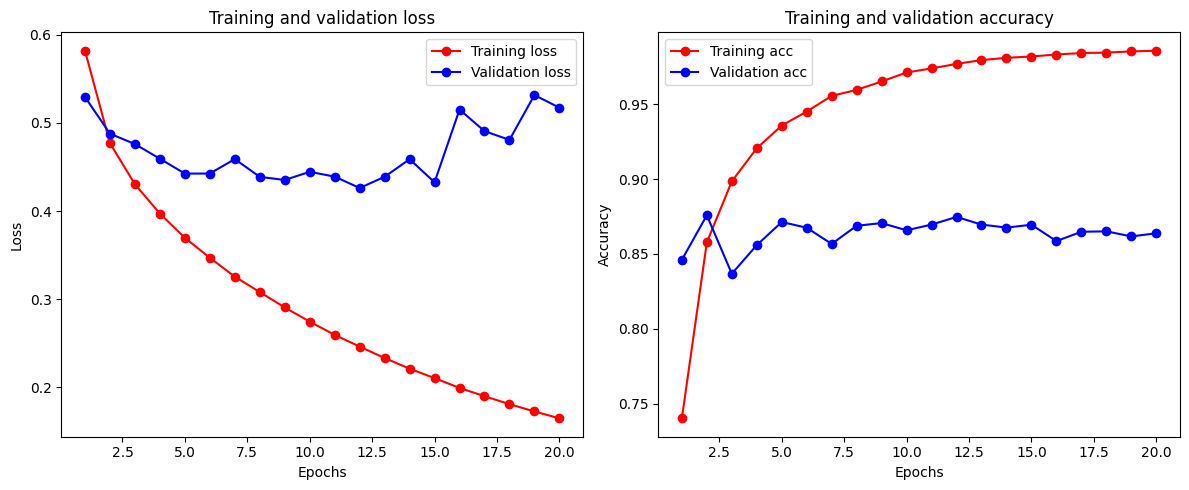

In [ ]:
# Define model
model = tf.keras.models.Sequential([
tf.keras.layers.Dense(4, activation='relu', input_shape=(10000,)),
tf.keras.layers.Dense(1, activation='relu'),
tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile model
model.compile(optimizer=optimizers.RMSprop(learning_rate=0.001),
              loss=losses.binary_crossentropy,
              metrics=['accuracy'])

# Train model and store history
history = train_and_save_history(model, partial_x_train, partial_y_train, x_val, y_val, 20, 256, all_histories)

# Evaluate model performance
results = model.evaluate(x_test, y_test)
print(f"Test Loss: {results[0]}, Test Accuracy: {results[1]}")

# Plot both training and validation loss and accuracy of the last training
plot_history(all_histories[-1])

# Performance_Model_02

In [ ]:
df = generate_performance_dataframe(model, history)
print(df)

clean_mem()

        Model  Layers  Units     LR  mom    L1    L2 Dropout  Min.V.Loss  \
0  sequential       3      4  0.001  0.0  None  None    None    0.426134   

   Max.V.Acc  
0     0.8758  


# Model_02 Summary  
The model's accuracy gradually improves during training, but starts to fluctuate on validation loss value, but remains stable on validation accuracy value, meaning it is overfitting and perform less well on unseen data. Moreover, the highest validation accuracy value of Model_02 is 0.833, lower than that of Model_01, which is 0.8912. According to our strategy, we are going to modify other hyperparameter and leave Model_02 alone as for now.

# Model_03
layer=2  
epochs=20  
batch_size=256  
learning rate=0.0001(new)

Epoch 1/20
59/59 [==============================] - 4s 52ms/step - loss: 0.6788 - accuracy: 0.5940 - val_loss: 0.6648 - val_accuracy: 0.6488
Epoch 2/20
59/59 [==============================] - 1s 20ms/step - loss: 0.6460 - accuracy: 0.7009 - val_loss: 0.6358 - val_accuracy: 0.7383
Epoch 3/20
59/59 [==============================] - 1s 18ms/step - loss: 0.6159 - accuracy: 0.7764 - val_loss: 0.6099 - val_accuracy: 0.7729
Epoch 4/20
59/59 [==============================] - 2s 29ms/step - loss: 0.5887 - accuracy: 0.8103 - val_loss: 0.5859 - val_accuracy: 0.8029
Epoch 5/20
59/59 [==============================] - 2s 36ms/step - loss: 0.5636 - accuracy: 0.8329 - val_loss: 0.5639 - val_accuracy: 0.8205
Epoch 6/20
59/59 [==============================] - 2s 35ms/step - loss: 0.5404 - accuracy: 0.8468 - val_loss: 0.5435 - val_accuracy: 0.8302
Epoch 7/20
59/59 [==============================] - 2s 25ms/step - loss: 0.5189 - accuracy: 0.8579 - val_loss: 0.5250 - val_accuracy: 0.8365
Epoch 8/20
59

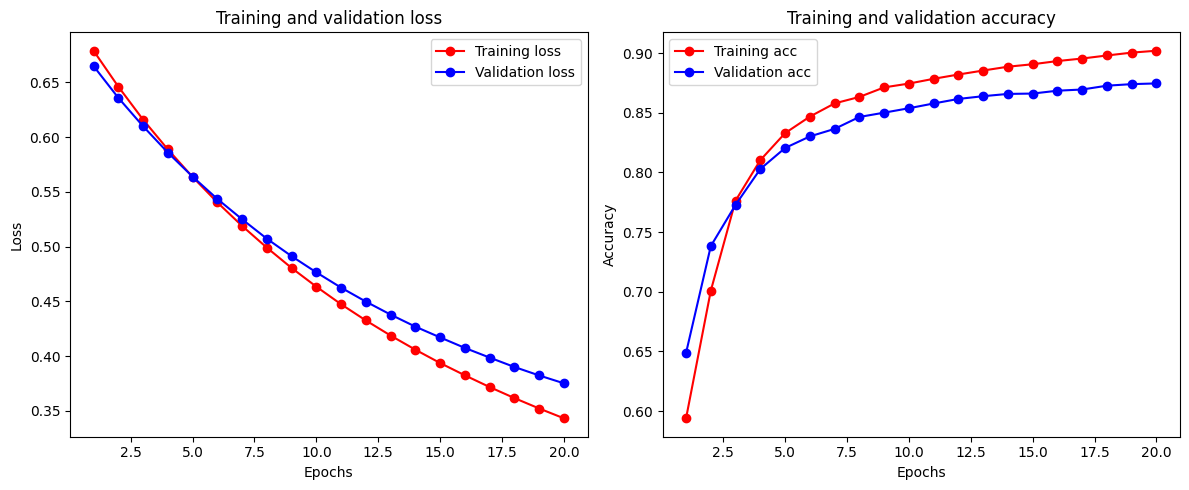

In [ ]:
# Define model
model = tf.keras.models.Sequential([
tf.keras.layers.Dense(4, activation='relu', input_shape=(10000,)),
tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile model
model.compile(optimizer=optimizers.RMSprop(learning_rate=0.0001),
              loss=losses.binary_crossentropy,
              metrics=['accuracy'])

# Train model and store history
history = train_and_save_history(model, partial_x_train, partial_y_train, x_val, y_val, 20, 256, all_histories)

# Evaluate model performance
results = model.evaluate(x_test, y_test)
print(f"Test Loss: {results[0]}, Test Accuracy: {results[1]}")

# Plot both training and validation loss and accuracy of the last training
plot_history(all_histories[-1])

# Performance_Model_03:  

In [ ]:
df = generate_performance_dataframe(model, history)
print(df)

clean_mem()

        Model  Layers  Units      LR  mom    L1    L2 Dropout  Min.V.Loss  \
0  sequential       2      4  0.0001  0.0  None  None    None    0.375243   

   Max.V.Acc  
0     0.8746  


# Model_03 Summary:   
The result of the tuning of the learning rate proves that the key to gradient descent parameters is learning rate(5-3-1, DLWP) is true.
Comparing the overall performance between Model_01 and Model_03, the Model_03 overall test Loss is 0.3853, and the overall test accuracy is 0.8690, which is all better than the Model_01 test loss of 0.4392, test accuracy is 0.8650. The smooth learning curve of training loss and accuracy and that of validation loss and accuracy is on a satisfactory level. Model_03 test loss decreased from 0.6788 to 0.3433, showing that the model gradually improves its predictions. Model_03 validation loss dropped from 0.6648 to 0.3752, showing that the model performs well on unseen data without significant overfitting. Model_03 training accuracy increased from 0.5940 to 0.9020, indicating that model's performance on training set is steady improving. The validation accuracy increased from 0.6488 to 0.8746, demonstrating the well generalization ability of the model on unseen data.

Moreover, considering of overfitting, both loss curves were steadily decreased. There were no signs of overfitting such as validation loss decreased at first but later on increased or traning accuracy is siginificantly higher than validation accuracy.

Furthermore, the steady increase in accuracy and steady decrease in loss provide evidence that the model is steady learning and is neither oscillated nor stagnated by the learning rate.  

Overall, even though the highest validation accuracy rate 0.8746 is slightly lower than the Model_01 validation accuracy value of 0.8910, we still can choose Model_03 as the fundamental for the further training process. But before we move on, we want to check the affection of learning rate.  

Apparently, tuning the learning rate has a significant impact on model learning, we can further tuning on different learning rates, but before we start to verify the learning rate, it is worth noting that, all the loss values are decreasing and all the accuracy values are increasing, so we can increase the epoch to 30 for a test first.

# Model_03-1(increase epoch)    

layer=2  
epochs=30(new, from 20 to 30)  
batch_size=256  
learning rate=0.0001  


Epoch 1/30
59/59 [==============================] - 6s 98ms/step - loss: 0.6801 - accuracy: 0.5943 - val_loss: 0.6621 - val_accuracy: 0.6686
Epoch 2/30
59/59 [==============================] - 5s 82ms/step - loss: 0.6423 - accuracy: 0.7267 - val_loss: 0.6277 - val_accuracy: 0.7459
Epoch 3/30
59/59 [==============================] - 2s 31ms/step - loss: 0.6071 - accuracy: 0.7923 - val_loss: 0.5972 - val_accuracy: 0.7915
Epoch 4/30
59/59 [==============================] - 1s 22ms/step - loss: 0.5758 - accuracy: 0.8227 - val_loss: 0.5704 - val_accuracy: 0.8114
Epoch 5/30
59/59 [==============================] - 1s 18ms/step - loss: 0.5477 - accuracy: 0.8425 - val_loss: 0.5461 - val_accuracy: 0.8229
Epoch 6/30
59/59 [==============================] - 1s 23ms/step - loss: 0.5224 - accuracy: 0.8510 - val_loss: 0.5249 - val_accuracy: 0.8312
Epoch 7/30
59/59 [==============================] - 1s 21ms/step - loss: 0.4996 - accuracy: 0.8609 - val_loss: 0.5050 - val_accuracy: 0.8389
Epoch 8/30
59

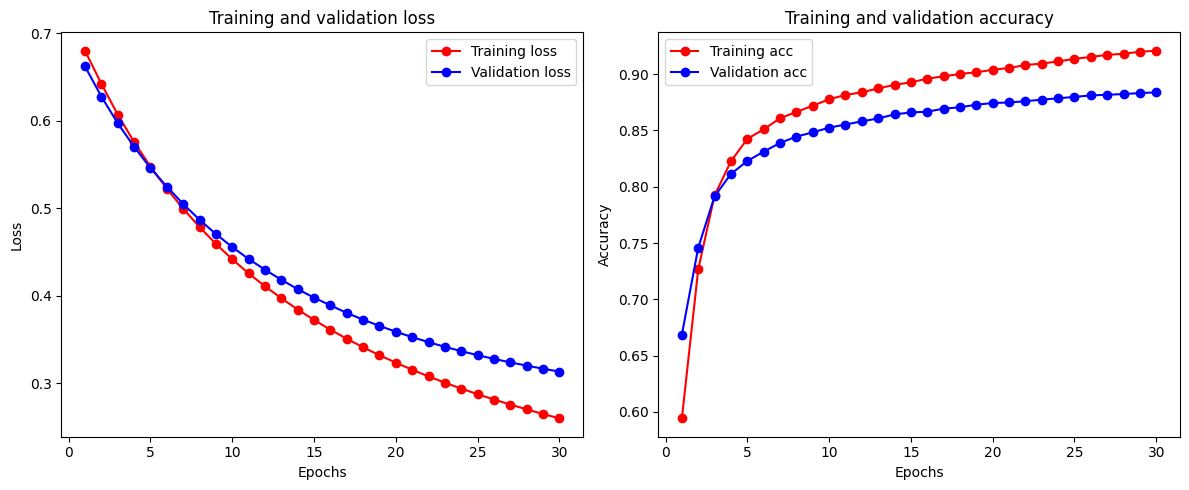

In [ ]:
# Define model
model = tf.keras.models.Sequential([
tf.keras.layers.Dense(4, activation='relu', input_shape=(10000,)),
tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile model
model.compile(optimizer=optimizers.RMSprop(learning_rate=0.0001),
              loss=losses.binary_crossentropy,
              metrics=['accuracy'])

# Train model and store history
history = train_and_save_history(model, partial_x_train, partial_y_train, x_val, y_val, 30, 256, all_histories)

# Evaluate model performance
results = model.evaluate(x_test, y_test)
print(f"Test Loss: {results[0]}, Test Accuracy: {results[1]}")

# Plot both training and validation loss and accuracy of the last training
plot_history(all_histories[-1])

#Model_03-1 Summary:  
We can easily find that all values ​​are stably getting better, but we also can see that the amplitude has become smaller. We increase epoch to 50 and see if it will overfitting.

In [ ]:
df = generate_performance_dataframe(model, history)
print(df)

clean_mem()

        Model  Layers  Units      LR  mom    L1    L2 Dropout  Min.V.Loss  \
0  sequential       2      4  0.0001  0.0  None  None    None    0.313429   

   Max.V.Acc  
0     0.8839  


# Model_03-2(increase epoch)  

layer=2  
epochs=50(new, from 30 to 50)  
batch_size=256  
learning rate=0.0001  


Epoch 1/50
59/59 [==============================] - 4s 57ms/step - loss: 0.6865 - accuracy: 0.5600 - val_loss: 0.6755 - val_accuracy: 0.6202
Epoch 2/50
59/59 [==============================] - 2s 33ms/step - loss: 0.6627 - accuracy: 0.6469 - val_loss: 0.6521 - val_accuracy: 0.6949
Epoch 3/50
59/59 [==============================] - 2s 28ms/step - loss: 0.6375 - accuracy: 0.7211 - val_loss: 0.6294 - val_accuracy: 0.7277
Epoch 4/50
59/59 [==============================] - 1s 23ms/step - loss: 0.6135 - accuracy: 0.7666 - val_loss: 0.6079 - val_accuracy: 0.7671
Epoch 5/50
59/59 [==============================] - 1s 23ms/step - loss: 0.5906 - accuracy: 0.8005 - val_loss: 0.5875 - val_accuracy: 0.7938
Epoch 6/50
59/59 [==============================] - 1s 23ms/step - loss: 0.5687 - accuracy: 0.8249 - val_loss: 0.5681 - val_accuracy: 0.8141
Epoch 7/50
59/59 [==============================] - 1s 18ms/step - loss: 0.5479 - accuracy: 0.8395 - val_loss: 0.5497 - val_accuracy: 0.8249
Epoch 8/50
59

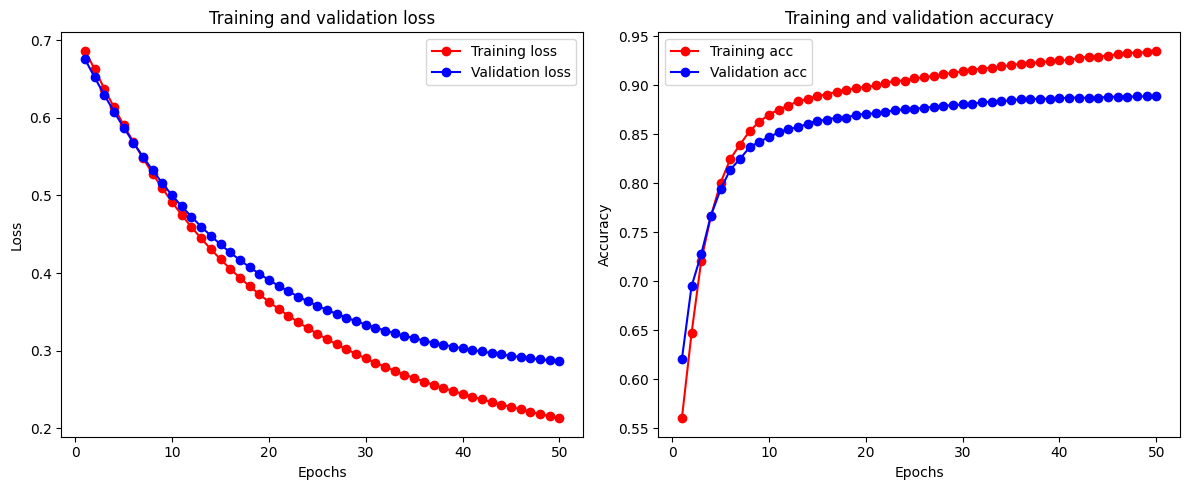

In [ ]:
# Define model
model = tf.keras.models.Sequential([
tf.keras.layers.Dense(4, activation='relu', input_shape=(10000,)),
tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile model
model.compile(optimizer=optimizers.RMSprop(learning_rate=0.0001),
              loss=losses.binary_crossentropy,
              metrics=['accuracy'])

# Train model and store history
history = train_and_save_history(model, partial_x_train, partial_y_train, x_val, y_val, 50, 256, all_histories)

# Evaluate model performance
results = model.evaluate(x_test, y_test)
print(f"Test Loss: {results[0]}, Test Accuracy: {results[1]}")

# Plot both training and validation loss and accuracy of the last training
plot_history(all_histories[-1])

# Model_03-2 Summary:  
The model has gone through 50 training stages (epochs), representing a complete traversal of the model over the entire training dataset.

However, it starts to oscillate on epoch 42 and seems reaching its learning limitation among epochs 48, 49, and 50. Other possible explanations include the need to be specific fine-tuning or the dataset or model limitations.

Overall, we decided to stop here because the distance of training and validation loss curve is enlarged, it is a sign of overfitting. Therefore we shall just leave Model_03-2 here for now.

In [ ]:
df = generate_performance_dataframe(model, history)
print(df)

clean_mem()

        Model  Layers  Units      LR  mom    L1    L2 Dropout  Min.V.Loss  \
0  sequential       2      4  0.0001  0.0  None  None    None    0.286158   

   Max.V.Acc  
0     0.8889  


# Learning rate tuning summary:  
Model_04(learning rate=0.0005):  
Compared with Model_03, Model_04 has better accuracy and loss during training but is accompanied by a large gap between test accuracy, 0.9727, and validation accuracy, 0.8921, indicating the sign of overfitting. Moreover, the validation accuracy rate reached the highest value, 0.8905 at epoch 10, then roughly remained at 0.88, illustrating the sign of overfitting as well. Last, it performed well during the training process, and its accuracy gradually improved, showing the capability on certain levels of generalizations.

Model_05(learning rate=0.0004):  
It appears the same problem(overfitting, but earlier, on epoch 5) as Model_04, but the overall performance is slightly better than Model_04.  

Model_06(learning rate=0.0003):  
Also, it started overfitting on epoch 6) as Model_04, but the overall performance is slightly worse than Model_04.  

Model_07(learning rate=0.0002):  
Apparently, the learning rate tuning shall stop here because the overall performance of test loss and validation were separately increased by 17% and dropped by 4%.  

### Hence, Model_04 will be choosed for further training.

# Model_04(Learning rate tuning)  
layer=2  
epochs=20  
batch_size=256  
learning rate=0.0005(new)

In [ ]:
# Define model
model = tf.keras.models.Sequential([
tf.keras.layers.Dense(4, activation='relu', input_shape=(10000,)),
tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile model
model.compile(optimizer=optimizers.RMSprop(learning_rate=0.0005),
              loss=losses.binary_crossentropy,
              metrics=['accuracy'])

# Train model and store history
history = train_and_save_history(model, partial_x_train, partial_y_train, x_val, y_val, 20, 256, all_histories)

# Evaluate model performance
results = model.evaluate(x_test, y_test)
print(f"Test Loss: {results[0]}, Test Accuracy: {results[1]}")

Epoch 1/20
59/59 [==============================] - 3s 44ms/step - loss: 0.5666 - accuracy: 0.7899 - val_loss: 0.4903 - val_accuracy: 0.8405
Epoch 2/20
59/59 [==============================] - 2s 29ms/step - loss: 0.4286 - accuracy: 0.8753 - val_loss: 0.4093 - val_accuracy: 0.8629
Epoch 3/20
59/59 [==============================] - 2s 29ms/step - loss: 0.3531 - accuracy: 0.8948 - val_loss: 0.3589 - val_accuracy: 0.8756
Epoch 4/20
59/59 [==============================] - 1s 25ms/step - loss: 0.3038 - accuracy: 0.9093 - val_loss: 0.3285 - val_accuracy: 0.8821
Epoch 5/20
59/59 [==============================] - 1s 18ms/step - loss: 0.2691 - accuracy: 0.9180 - val_loss: 0.3095 - val_accuracy: 0.8846
Epoch 6/20
59/59 [==============================] - 2s 27ms/step - loss: 0.2432 - accuracy: 0.9243 - val_loss: 0.2960 - val_accuracy: 0.8876
Epoch 7/20
59/59 [==============================] - 1s 20ms/step - loss: 0.2222 - accuracy: 0.9305 - val_loss: 0.2876 - val_accuracy: 0.8893
Epoch 8/20
59

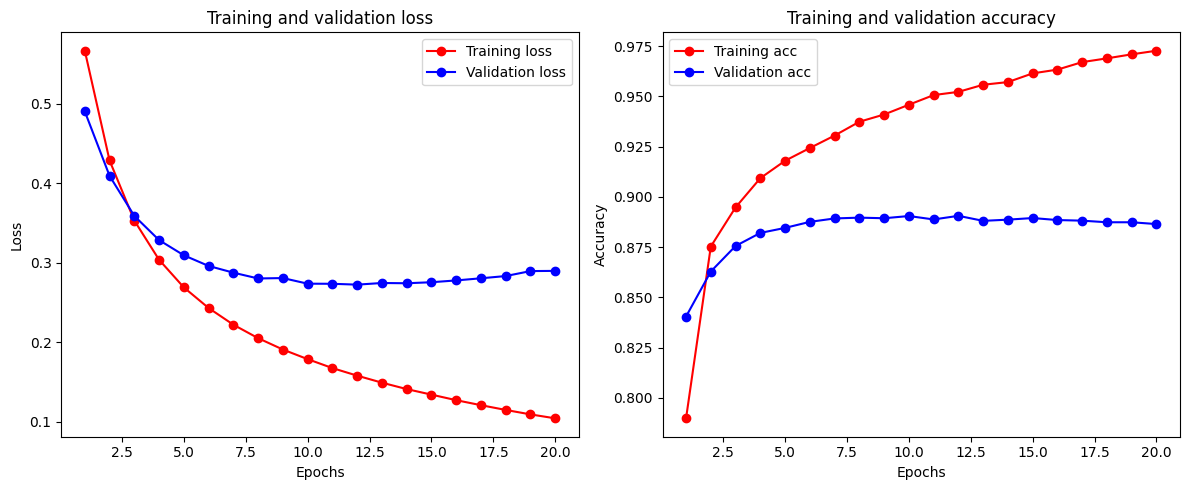

In [ ]:
# Plot both training and validation loss and accuracy of the last training
plot_history(all_histories[-1])

# Performance_Model_04:

In [ ]:
df = generate_performance_dataframe(model, history)
print(df)

clean_mem()

        Model  Layers  Units      LR  mom    L1    L2 Dropout  Min.V.Loss  \
0  sequential       2      4  0.0005  0.0  None  None    None    0.272541   

   Max.V.Acc  
0     0.8906  


# Model_05(Learning rate tuning)    
layer=2  
epochs=20  
batch_size=256  
learning rate=0.0004(new)

Epoch 1/20
59/59 [==============================] - 3s 44ms/step - loss: 0.5869 - accuracy: 0.7535 - val_loss: 0.5119 - val_accuracy: 0.8290
Epoch 2/20
59/59 [==============================] - 2s 28ms/step - loss: 0.4522 - accuracy: 0.8635 - val_loss: 0.4287 - val_accuracy: 0.8556
Epoch 3/20
59/59 [==============================] - 1s 19ms/step - loss: 0.3754 - accuracy: 0.8885 - val_loss: 0.3766 - val_accuracy: 0.8699
Epoch 4/20
59/59 [==============================] - 2s 28ms/step - loss: 0.3245 - accuracy: 0.9000 - val_loss: 0.3443 - val_accuracy: 0.8783
Epoch 5/20
59/59 [==============================] - 1s 20ms/step - loss: 0.2891 - accuracy: 0.9103 - val_loss: 0.3218 - val_accuracy: 0.8827
Epoch 6/20
59/59 [==============================] - 1s 18ms/step - loss: 0.2622 - accuracy: 0.9176 - val_loss: 0.3064 - val_accuracy: 0.8864
Epoch 7/20
59/59 [==============================] - 2s 29ms/step - loss: 0.2406 - accuracy: 0.9261 - val_loss: 0.2962 - val_accuracy: 0.8872
Epoch 8/20
59

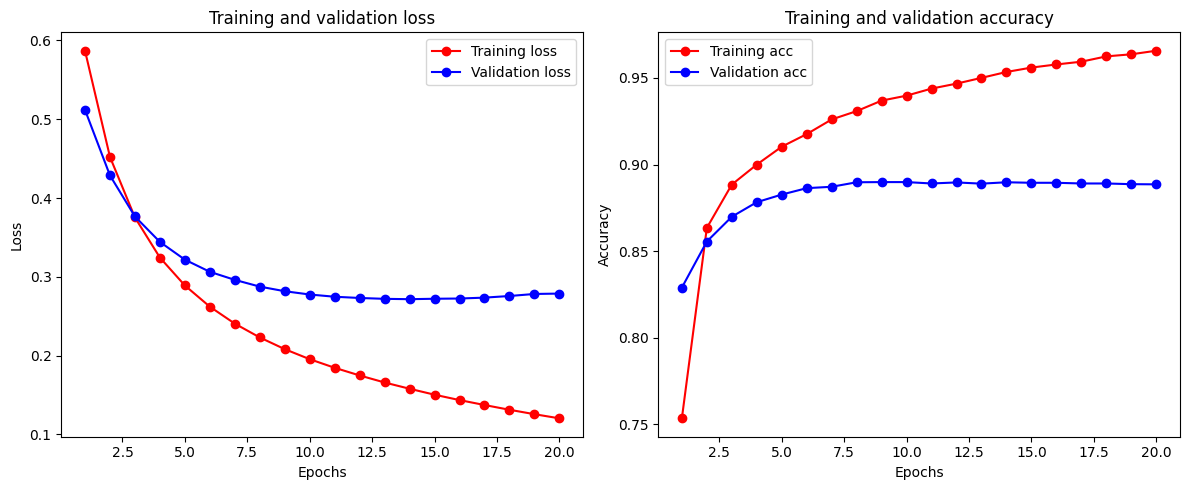

In [ ]:
# Define model
model = tf.keras.models.Sequential([
tf.keras.layers.Dense(4, activation='relu', input_shape=(10000,)),
tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile model
model.compile(optimizer=optimizers.RMSprop(learning_rate=0.0004),
              loss=losses.binary_crossentropy,
              metrics=['accuracy'])

# Train model and store history
history = train_and_save_history(model, partial_x_train, partial_y_train, x_val, y_val, 20, 256, all_histories)


# Evaluate model performance
results = model.evaluate(x_test, y_test)
print(f"Test Loss: {results[0]}, Test Accuracy: {results[1]}")

# Plot both training and validation loss and accuracy of the last training
plot_history(all_histories[-1])

# Performance_Model_05:

In [ ]:
df = generate_performance_dataframe(model, history)
print(df)

clean_mem()

        Model  Layers  Units      LR  mom    L1    L2 Dropout  Min.V.Loss  \
0  sequential       2      4  0.0004  0.0  None  None    None    0.271667   

   Max.V.Acc  
0     0.8899  


# Model_06(Learning rate tuning)    
layer=2  
epochs=20  
batch_size=256  
learning rate=0.0003(new)

Epoch 1/20
59/59 [==============================] - 3s 45ms/step - loss: 0.6214 - accuracy: 0.7086 - val_loss: 0.5526 - val_accuracy: 0.8000
Epoch 2/20
59/59 [==============================] - 2s 29ms/step - loss: 0.4943 - accuracy: 0.8497 - val_loss: 0.4667 - val_accuracy: 0.8494
Epoch 3/20
59/59 [==============================] - 1s 19ms/step - loss: 0.4165 - accuracy: 0.8807 - val_loss: 0.4120 - val_accuracy: 0.8623
Epoch 4/20
59/59 [==============================] - 1s 19ms/step - loss: 0.3633 - accuracy: 0.8942 - val_loss: 0.3755 - val_accuracy: 0.8707
Epoch 5/20
59/59 [==============================] - 1s 24ms/step - loss: 0.3248 - accuracy: 0.9058 - val_loss: 0.3486 - val_accuracy: 0.8790
Epoch 6/20
59/59 [==============================] - 2s 28ms/step - loss: 0.2954 - accuracy: 0.9125 - val_loss: 0.3294 - val_accuracy: 0.8826
Epoch 7/20
59/59 [==============================] - 1s 21ms/step - loss: 0.2724 - accuracy: 0.9190 - val_loss: 0.3153 - val_accuracy: 0.8860
Epoch 8/20
59

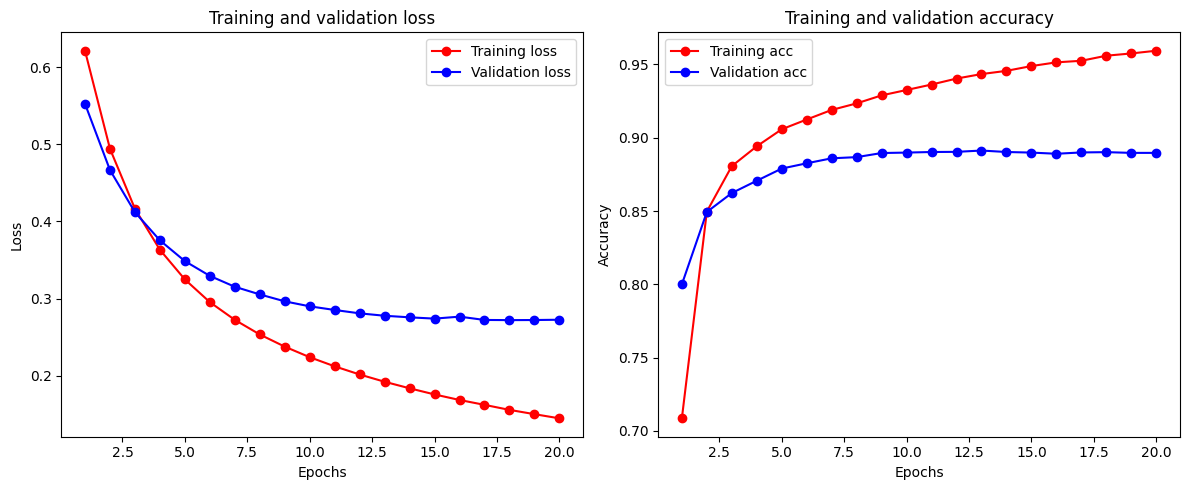

In [ ]:
# Define model
model = tf.keras.models.Sequential([
tf.keras.layers.Dense(4, activation='relu', input_shape=(10000,)),
tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile model
model.compile(optimizer=optimizers.RMSprop(learning_rate=0.0003),
              loss=losses.binary_crossentropy,
              metrics=['accuracy'])

# Train model and store history
history = train_and_save_history(model, partial_x_train, partial_y_train, x_val, y_val, 20, 256, all_histories)

# Evaluate model performance
results = model.evaluate(x_test, y_test)
print(f"Test Loss: {results[0]}, Test Accuracy: {results[1]}")

# Plot both training and validation loss and accuracy of the last training
plot_history(all_histories[-1])

# Performance_Model_06:

In [ ]:
df = generate_performance_dataframe(model, history)
print(df)

clean_mem()

        Model  Layers  Units      LR  mom    L1    L2 Dropout  Min.V.Loss  \
0  sequential       2      4  0.0003  0.0  None  None    None    0.449088   

   Max.V.Acc  
0     0.8664  


# Model_07(Learning rate tuning)    
layer=2  
epochs=20  
batch_size=256  
learning rate=0.0002(new)

Epoch 1/20
59/59 [==============================] - 4s 53ms/step - loss: 0.6743 - accuracy: 0.5463 - val_loss: 0.6473 - val_accuracy: 0.5633
Epoch 2/20
59/59 [==============================] - 2s 29ms/step - loss: 0.6210 - accuracy: 0.6021 - val_loss: 0.6062 - val_accuracy: 0.5972
Epoch 3/20
59/59 [==============================] - 1s 18ms/step - loss: 0.5819 - accuracy: 0.6695 - val_loss: 0.5761 - val_accuracy: 0.6856
Epoch 4/20
59/59 [==============================] - 2s 28ms/step - loss: 0.5532 - accuracy: 0.7257 - val_loss: 0.5552 - val_accuracy: 0.7229
Epoch 5/20
59/59 [==============================] - 2s 28ms/step - loss: 0.5312 - accuracy: 0.7655 - val_loss: 0.5398 - val_accuracy: 0.7420
Epoch 6/20
59/59 [==============================] - 2s 28ms/step - loss: 0.5134 - accuracy: 0.7955 - val_loss: 0.5265 - val_accuracy: 0.7799
Epoch 7/20
59/59 [==============================] - 1s 19ms/step - loss: 0.4982 - accuracy: 0.8219 - val_loss: 0.5163 - val_accuracy: 0.7919
Epoch 8/20
59

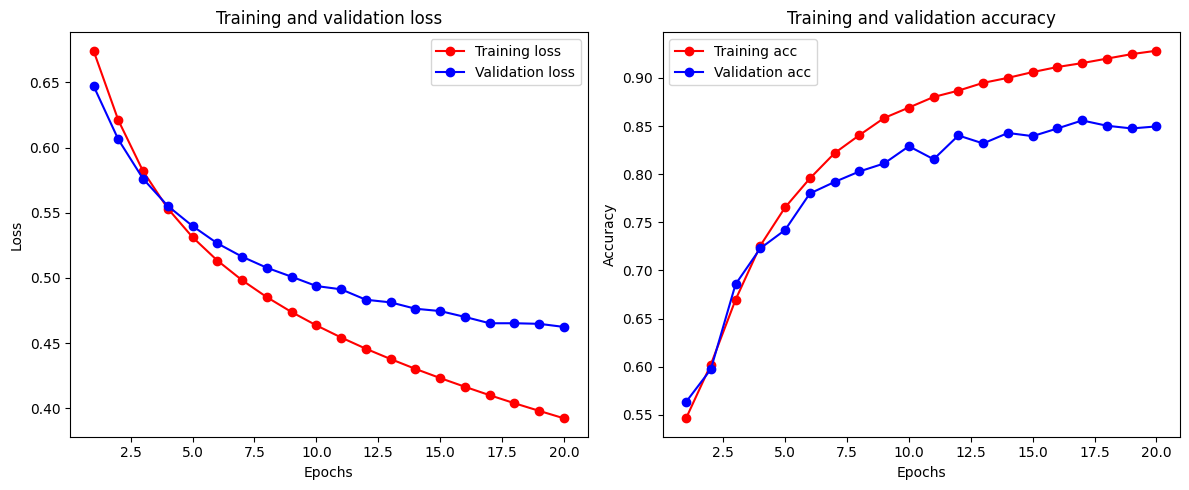

In [ ]:
# Define model
model = tf.keras.models.Sequential([
tf.keras.layers.Dense(4, activation='relu', input_shape=(10000,)),
tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile model
model.compile(optimizer=optimizers.RMSprop(learning_rate=0.0002),
              loss=losses.binary_crossentropy,
              metrics=['accuracy'])

# Train model and store history
history = train_and_save_history(model, partial_x_train, partial_y_train, x_val, y_val, 20, 256, all_histories)

# Evaluate model performance
results = model.evaluate(x_test, y_test)
print(f"Test Loss: {results[0]}, Test Accuracy: {results[1]}")

# Plot both training and validation loss and accuracy of the last training
plot_history(all_histories[-1])

# Performance_Model_07:

In [ ]:
df = generate_performance_dataframe(model, history)
print(df)

clean_mem()

          Model  Layers  Units      LR  mom    L1    L2 Dropout  Min.V.Loss  \
0  sequential_1       2      4  0.0002  0.0  None  None    None    0.462425   

   Max.V.Acc  
0     0.8558  


# Next step: Improved the generalization.  

Because Model_04 demonstrated the early sign of overfitting but the highest validation accuracy rate(0.8905), we decided to introduce L1, L2, and L1+L2 regularization.

Few strategies we can choose:  
1. Dataset curation:  
    Including Data Collection, Data Cleansing, Data annotation, Data augmentation, Data splitting, and Data maintenance and updates. We already choose data splitting at the very beginning, and the rest methods have to be taken. Let's take a look for the next one.

2. Feature engineering:  
    This is out of scope for now(out of my abilitie for now.). Next one.

3. Using early stopping:  
    Early stopping is usually adopted in the model that shows the evidences of overfitting. We can save this option for tuning Model_04. Considering of far exceed the minimum number of parameters required to fit the underlying manifold of the data, over-parameterization of deep learning models is common. Furthermore, the incompletely fitting model is usual as well, because a perfect fit will not generalize well. Therefore, the early stoppiing can be use on before the reaching the minimum possible training loss to avoid overfitting, meaning interrupt training at some point. We can conclude that the most effective way of finding the most generalizable fitting point during training, which means locating the exact boundary between the underfitting and overfitting curves. Since Model_03 has no overfitting issue, we can test the early stopping on Model_04.
    
4. Regularizing your model:  

    4.1 Adjusting the network's size:  
    Our network currently contains only 2 layers and 4 units, so this can be an option for Model_04.

    4.2 Adding weight regularization: L1, L2, L1+L2:  
    L1 regularization (Lasso regularization) adds the sum of the absolute values ​​of the weights to the loss function. This usually applies to when the number of features is large and only a few are important. It also can reduce unnecessary features When model interpretability is necessary.  

    L2 regularization (Ridge regularization) adds the sum of squared weights to the loss function. This usually applies when data features are highly correlated and all features are required to determine the output.  

    The L1 + L2(Elastic Net) combines the characteristics of both, and a trade-off can be made between the two by adjusting parameters. Usually is suitable for situations where there are a large number of features and there is a certain correlation between them.  

    Because Model_04 demonstrated the early sign of overfitting but the highest validation accuracy rate(0.8905). Although the model is a linear model(2 layers only), we still decided to introduce L1, L2, and L1+L2 regularization to check which of them works well on neutralized overfitting.

    4.3 Adding Dropout:  
    Dropout is a technique commonly used to reduce overfitting, which prevents the model from being overly dependent on specific features of the training data set by randomly "turning off" a subset of neurons during training.  We can test how's the effect in Model_04 with only input and output layers (without hidden layers).


# L1 regularization tuning summary:  
Model_04-3(L1=0.00001) shows an overall improvement compared with Model_04, 04-1, and 04-2, even if it is still a little bit overfitting, we could use callback for later tuning.

## Hence, we keep Model_04-3.

# Model_04-1:  
layer=2  
epochs=20  
batch_size=256  
learning rate=0.0005(Learning rate tuning winner)  
L1=0.001(new)

Epoch 1/20
59/59 [==============================] - 4s 61ms/step - loss: 0.7929 - accuracy: 0.7662 - val_loss: 0.6234 - val_accuracy: 0.8359
Epoch 2/20
59/59 [==============================] - 2s 28ms/step - loss: 0.5823 - accuracy: 0.8473 - val_loss: 0.5590 - val_accuracy: 0.8450
Epoch 3/20
59/59 [==============================] - 1s 19ms/step - loss: 0.5339 - accuracy: 0.8575 - val_loss: 0.5245 - val_accuracy: 0.8512
Epoch 4/20
59/59 [==============================] - 1s 18ms/step - loss: 0.5038 - accuracy: 0.8637 - val_loss: 0.5014 - val_accuracy: 0.8545
Epoch 5/20
59/59 [==============================] - 1s 22ms/step - loss: 0.4832 - accuracy: 0.8672 - val_loss: 0.4855 - val_accuracy: 0.8558
Epoch 6/20
59/59 [==============================] - 1s 18ms/step - loss: 0.4688 - accuracy: 0.8686 - val_loss: 0.4733 - val_accuracy: 0.8572
Epoch 7/20
59/59 [==============================] - 1s 17ms/step - loss: 0.4579 - accuracy: 0.8688 - val_loss: 0.4705 - val_accuracy: 0.8572
Epoch 8/20
59

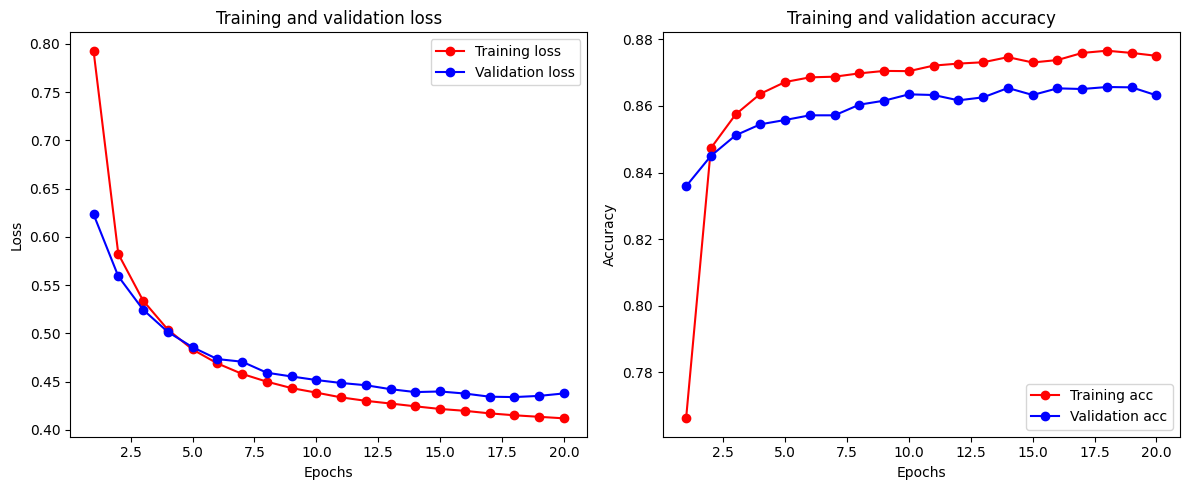

In [ ]:
# define model
model = tf.keras.models.Sequential([
tf.keras.layers.Dense(4, activation='relu', input_shape=(10000,),
                      kernel_regularizer=regularizers.l1(0.001)),
tf.keras.layers.Dense(1, activation='sigmoid')
])

# compile model
model.compile(optimizer=optimizers.RMSprop(learning_rate=0.0005),
              loss=losses.binary_crossentropy,
              metrics=['accuracy'])

# training and store training history
history = train_and_save_history(model, partial_x_train, partial_y_train, x_val, y_val, 20, 256, all_histories)

# evaluate model performance
results = model.evaluate(x_test, y_test)
print(f"Test Loss: {results[0]}, Test Accuracy: {results[1]}")

# plot last training loss and accuraccy
plot_history(all_histories[-1])

# Performance_Model_04-1

In [ ]:
df = generate_performance_dataframe(model, history)
print(df)

clean_mem()

        Model  Layers  Units      LR  mom     L1    L2 Dropout  Min.V.Loss  \
0  sequential       2      4  0.0005  0.0  0.001  None    None    0.441505   

   Max.V.Acc  
0     0.8612  


# Model_04-1 Summary:  
The performance on Model_04:  
Test Loss: 0.3078, Test Accuracy: 0.8783  
Min.V.Loss 0.2725, Max.V.Acc 0.8906  

We can find that after introducing L1=0.001, all performance values on Model_04-1 are decreased. Even though the validation and test losses are on a downtrend, the validation accuracy value oscillates starting from epoch 11 till the end of the training(epoch 20), indicating an early sign of overfitting.

# Model_04-2:  
layer=2  
epochs=20  
batch_size=256  
learning rate=0.0005(Learning rate tuning winner)  
L1=0.0005(new)

Epoch 1/20
59/59 [==============================] - 3s 47ms/step - loss: 0.7890 - accuracy: 0.7675 - val_loss: 0.5964 - val_accuracy: 0.8433
Epoch 2/20
59/59 [==============================] - 1s 22ms/step - loss: 0.5436 - accuracy: 0.8565 - val_loss: 0.5199 - val_accuracy: 0.8514
Epoch 3/20
59/59 [==============================] - 2s 26ms/step - loss: 0.4925 - accuracy: 0.8670 - val_loss: 0.4877 - val_accuracy: 0.8572
Epoch 4/20
59/59 [==============================] - 1s 19ms/step - loss: 0.4660 - accuracy: 0.8709 - val_loss: 0.4684 - val_accuracy: 0.8595
Epoch 5/20
59/59 [==============================] - 1s 21ms/step - loss: 0.4494 - accuracy: 0.8735 - val_loss: 0.4602 - val_accuracy: 0.8587
Epoch 6/20
59/59 [==============================] - 1s 18ms/step - loss: 0.4383 - accuracy: 0.8755 - val_loss: 0.4475 - val_accuracy: 0.8638
Epoch 7/20
59/59 [==============================] - 1s 21ms/step - loss: 0.4304 - accuracy: 0.8763 - val_loss: 0.4415 - val_accuracy: 0.8661
Epoch 8/20
59

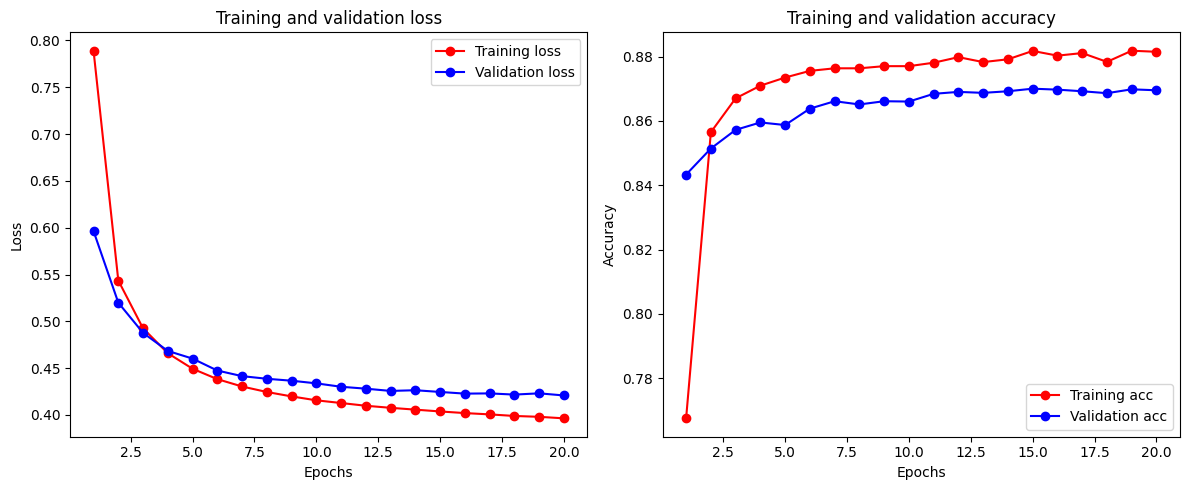

In [ ]:
# Define model
model = tf.keras.models.Sequential([
tf.keras.layers.Dense(4, activation='relu', input_shape=(10000,),
                      kernel_regularizer=regularizers.l1(0.001)),
tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile model
model.compile(optimizer=optimizers.RMSprop(learning_rate=0.0005),
              loss=losses.binary_crossentropy,
              metrics=['accuracy'])

# Train model and store history
history = train_and_save_history(model, partial_x_train, partial_y_train, x_val, y_val, 20, 256, all_histories)

# Evaluate model performance
results = model.evaluate(x_test, y_test)
print(f"Test Loss: {results[0]}, Test Accuracy: {results[1]}")

# Plot both training and validation loss and accuracy of the last training
plot_history(all_histories[-1])

# Performance_Model_04-2

In [ ]:
df = generate_performance_dataframe(model, history)
print(df)

clean_mem()

          Model  Layers  Units      LR  mom     L1    L2 Dropout  Min.V.Loss  \
0  sequential_1       2      4  0.0005  0.0  0.001  None    None     0.42085   

   Max.V.Acc  
0       0.87  


# Model_04-2 Summary:  
We can find that after introducing L1=0.0005, all performance values are actually similar to Model_04-1. Even though the validation and test losses are on a downtrend, the validation accuracy value oscillates starting from epoch 4 till the end of the training(epoch 20), indicating an early sign of overfitting(earlier than Model_04-1).

# Model_04-3:  
layer=2  
epochs=20  
batch_size=256  
learning rate=0.0005(Learning rate tuning winner)  
L1=0.00001(new)

Epoch 1/20
59/59 [==============================] - 2s 33ms/step - loss: 0.6408 - accuracy: 0.7593 - val_loss: 0.5933 - val_accuracy: 0.8219
Epoch 2/20
59/59 [==============================] - 1s 17ms/step - loss: 0.5434 - accuracy: 0.8513 - val_loss: 0.5121 - val_accuracy: 0.8424
Epoch 3/20
59/59 [==============================] - 1s 18ms/step - loss: 0.4635 - accuracy: 0.8726 - val_loss: 0.4506 - val_accuracy: 0.8561
Epoch 4/20
59/59 [==============================] - 1s 17ms/step - loss: 0.4042 - accuracy: 0.8845 - val_loss: 0.4064 - val_accuracy: 0.8656
Epoch 5/20
59/59 [==============================] - 1s 17ms/step - loss: 0.3594 - accuracy: 0.8967 - val_loss: 0.3744 - val_accuracy: 0.8739
Epoch 6/20
59/59 [==============================] - 1s 17ms/step - loss: 0.3245 - accuracy: 0.9035 - val_loss: 0.3487 - val_accuracy: 0.8785
Epoch 7/20
59/59 [==============================] - 1s 19ms/step - loss: 0.2968 - accuracy: 0.9111 - val_loss: 0.3307 - val_accuracy: 0.8823
Epoch 8/20
59

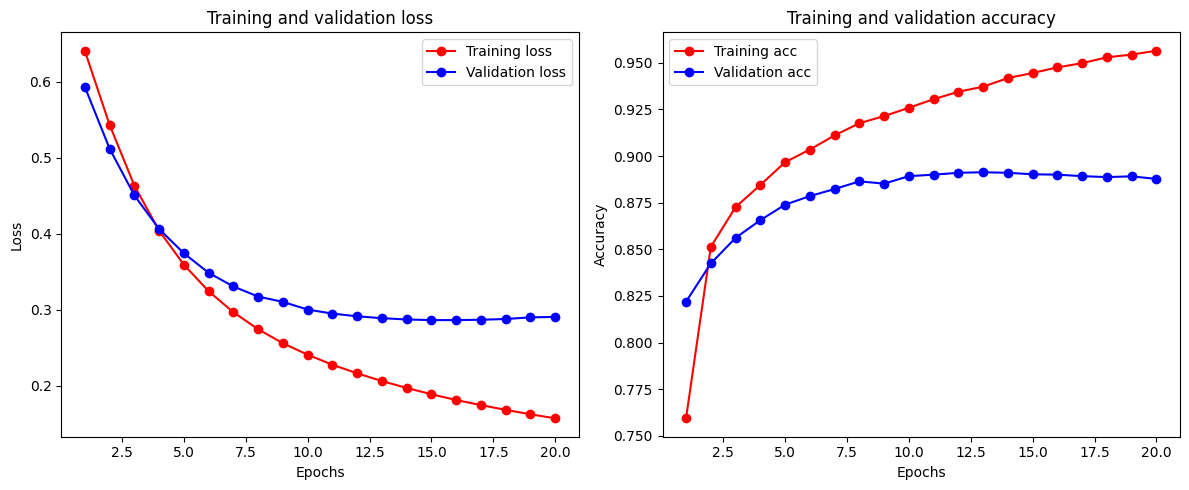

In [ ]:
# Define model
model = tf.keras.models.Sequential([
tf.keras.layers.Dense(4, activation='relu', input_shape=(10000,),
                      kernel_regularizer=regularizers.l1(0.00001)),
tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile model
model.compile(optimizer=optimizers.RMSprop(learning_rate=0.0005),
              loss=losses.binary_crossentropy,
              metrics=['accuracy'])

# Train model and store history
history = train_and_save_history(model, partial_x_train, partial_y_train, x_val, y_val, 20, 256, all_histories)

# Evaluate model performance
results = model.evaluate(x_test, y_test)
print(f"Test Loss: {results[0]}, Test Accuracy: {results[1]}")

# Plot both training and validation loss and accuracy of the last training
plot_history(all_histories[-1])

# Performance_Model_04-3

In [ ]:
df = generate_performance_dataframe(model, history)
print(df)

clean_mem()

          Model  Layers  Units      LR  mom       L1    L2 Dropout  \
0  sequential_1       2      4  0.0005  0.0  0.00001  None    None   

   Min.V.Loss  Max.V.Acc  
0    0.286445     0.8913  


# Model_04-3 Summary:   
The overall accuracy of Model04-3 (L1=0.0005) is slightly higher than Model_04 and the minimum validation loss is slightly higher than Model_04,  suggesting that L1=0.0005 may help the model generalize better to unseen data, so we can keep the Model_04-3.

# L2 regularization tuning summary:  
Because the penalty is only added at training time, the loss for the model will be much higher at training than at test time. Comparing the overall performance among Model_04-4(L2=0.001), Model_04-5(L2=0.0005), and Model_04-6(L2=0.00001),  
 ## we keep Model_04-6.

# Model_04-4:  
layer=2  
epochs=20  
batch_size=256  
learning rate=0.0005(Learning rate tuning winner)  
L2=0.001(new)

Epoch 1/20
59/59 [==============================] - 3s 35ms/step - loss: 0.6108 - accuracy: 0.7611 - val_loss: 0.5402 - val_accuracy: 0.8363
Epoch 2/20
59/59 [==============================] - 1s 18ms/step - loss: 0.4835 - accuracy: 0.8640 - val_loss: 0.4592 - val_accuracy: 0.8585
Epoch 3/20
59/59 [==============================] - 1s 18ms/step - loss: 0.4112 - accuracy: 0.8860 - val_loss: 0.4106 - val_accuracy: 0.8696
Epoch 4/20
59/59 [==============================] - 1s 17ms/step - loss: 0.3643 - accuracy: 0.8973 - val_loss: 0.3802 - val_accuracy: 0.8752
Epoch 5/20
59/59 [==============================] - 1s 17ms/step - loss: 0.3323 - accuracy: 0.9063 - val_loss: 0.3607 - val_accuracy: 0.8799
Epoch 6/20
59/59 [==============================] - 1s 18ms/step - loss: 0.3092 - accuracy: 0.9135 - val_loss: 0.3456 - val_accuracy: 0.8852
Epoch 7/20
59/59 [==============================] - 1s 18ms/step - loss: 0.2920 - accuracy: 0.9177 - val_loss: 0.3373 - val_accuracy: 0.8860
Epoch 8/20
59

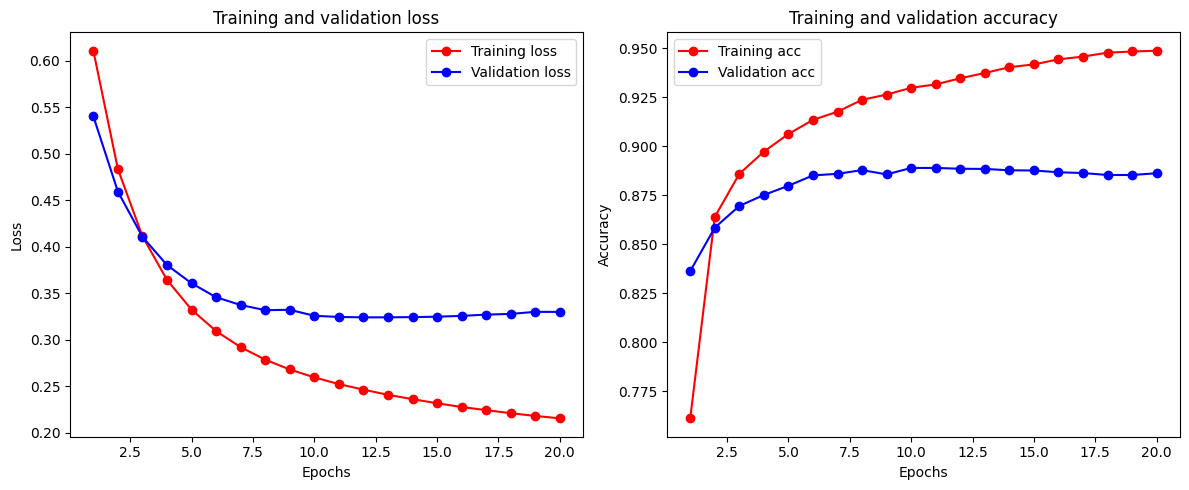

In [ ]:
# Define model
model = tf.keras.models.Sequential([
tf.keras.layers.Dense(4, activation='relu', input_shape=(10000,), kernel_regularizer=regularizers.l2(0.001)),
tf.keras.layers.Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l2(0.001))
])

# Compile model
model.compile(optimizer=optimizers.RMSprop(learning_rate=0.0005),
              loss=losses.binary_crossentropy,
              metrics=['accuracy'])

# Train model and store history
history = train_and_save_history(model, partial_x_train, partial_y_train, x_val, y_val, 20, 256, all_histories)

# Evaluate model performance
results = model.evaluate(x_test, y_test)
print(f"Test Loss: {results[0]}, Test Accuracy: {results[1]}")

# Plot both training and validation loss and accuracy of the last training
plot_history(all_histories[-1])

# Performance_Model_04-4

In [ ]:
df = generate_performance_dataframe(model, history)
print(df)

clean_mem()

        Model  Layers  Units      LR  mom    L1     L2 Dropout  Min.V.Loss  \
0  sequential       2      4  0.0005  0.0  None  0.001    None    0.324005   

   Max.V.Acc  
0      0.889  


# Model_04-4 Summary:  
We can find that when L2=0.001, although the loss during the training and verification process is slightly higher, it shows slightly better accuracy on the test dataset and also reduces the problem of overfitting to a certain extent. This illustrates that L2 regularization is effective in improving the generalization ability of the model.

# Model_04-5:   
layer=2  
epochs=20  
batch_size=256  
learning rate=0.0005(Learning rate tuning winner)  
L2=0.0005(new)

Epoch 1/20
59/59 [==============================] - 3s 36ms/step - loss: 0.5815 - accuracy: 0.7551 - val_loss: 0.4965 - val_accuracy: 0.8449
Epoch 2/20
59/59 [==============================] - 1s 24ms/step - loss: 0.4315 - accuracy: 0.8742 - val_loss: 0.4094 - val_accuracy: 0.8699
Epoch 3/20
59/59 [==============================] - 1s 18ms/step - loss: 0.3560 - accuracy: 0.8981 - val_loss: 0.3652 - val_accuracy: 0.8777
Epoch 4/20
59/59 [==============================] - 2s 27ms/step - loss: 0.3099 - accuracy: 0.9095 - val_loss: 0.3392 - val_accuracy: 0.8818
Epoch 5/20
59/59 [==============================] - 2s 32ms/step - loss: 0.2789 - accuracy: 0.9202 - val_loss: 0.3234 - val_accuracy: 0.8865
Epoch 6/20
59/59 [==============================] - 2s 32ms/step - loss: 0.2566 - accuracy: 0.9265 - val_loss: 0.3106 - val_accuracy: 0.8891
Epoch 7/20
59/59 [==============================] - 2s 33ms/step - loss: 0.2397 - accuracy: 0.9321 - val_loss: 0.3052 - val_accuracy: 0.8887
Epoch 8/20
59

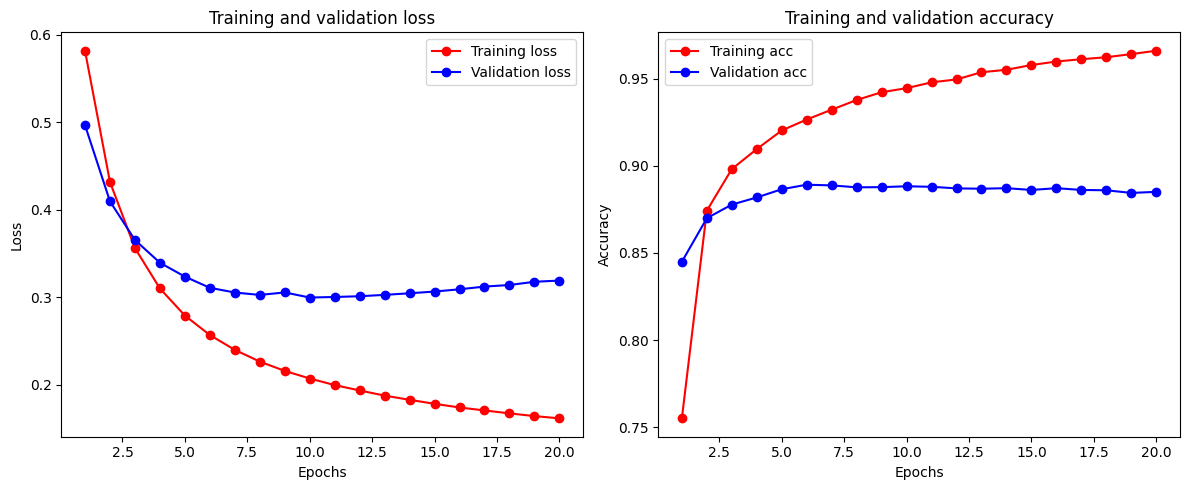

In [ ]:
# Define model
model = tf.keras.models.Sequential([
tf.keras.layers.Dense(4, activation='relu', input_shape=(10000,), kernel_regularizer=regularizers.l2(0.0005)),
tf.keras.layers.Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l2(0.0005))
])

# Compile model
model.compile(optimizer=optimizers.RMSprop(learning_rate=0.0005),
              loss=losses.binary_crossentropy,
              metrics=['accuracy'])

# Train model and store history
history = train_and_save_history(model, partial_x_train, partial_y_train, x_val, y_val, 20, 256, all_histories)

# Evaluate model performance
results = model.evaluate(x_test, y_test)
print(f"Test Loss: {results[0]}, Test Accuracy: {results[1]}")

# Plot both training and validation loss and accuracy of the last training
plot_history(all_histories[-1])

# Performance_Model_04-5

In [ ]:
df = generate_performance_dataframe(model, history)
print(df)

clean_mem()

        Model  Layers  Units      LR  mom    L1      L2 Dropout  Min.V.Loss  \
0  sequential       2      4  0.0005  0.0  None  0.0005    None    0.299488   

   Max.V.Acc  
0     0.8891  


# Model_04-5 Summary:  
Model_04-5 performs better in the early stages of training but is slightly worse than Model_04 in final test accuracy. Moreover, Model_04 shows relatively stable performance throughout the training process, especially in the validation phase.

# Model_04-6:   
layer=2  
epochs=20  
batch_size=256  
learning rate=0.0005(Learning rate tuning winner)  
L2=0.00001(new)

Epoch 1/20
59/59 [==============================] - 4s 50ms/step - loss: 0.6385 - accuracy: 0.7242 - val_loss: 0.5839 - val_accuracy: 0.8065
Epoch 2/20
59/59 [==============================] - 1s 19ms/step - loss: 0.5346 - accuracy: 0.8489 - val_loss: 0.5041 - val_accuracy: 0.8454
Epoch 3/20
59/59 [==============================] - 1s 24ms/step - loss: 0.4574 - accuracy: 0.8735 - val_loss: 0.4443 - val_accuracy: 0.8560
Epoch 4/20
59/59 [==============================] - 1s 25ms/step - loss: 0.3986 - accuracy: 0.8870 - val_loss: 0.4000 - val_accuracy: 0.8644
Epoch 5/20
59/59 [==============================] - 1s 19ms/step - loss: 0.3534 - accuracy: 0.8965 - val_loss: 0.3675 - val_accuracy: 0.8722
Epoch 6/20
59/59 [==============================] - 1s 19ms/step - loss: 0.3178 - accuracy: 0.9043 - val_loss: 0.3413 - val_accuracy: 0.8764
Epoch 7/20
59/59 [==============================] - 1s 25ms/step - loss: 0.2893 - accuracy: 0.9099 - val_loss: 0.3226 - val_accuracy: 0.8806
Epoch 8/20
59

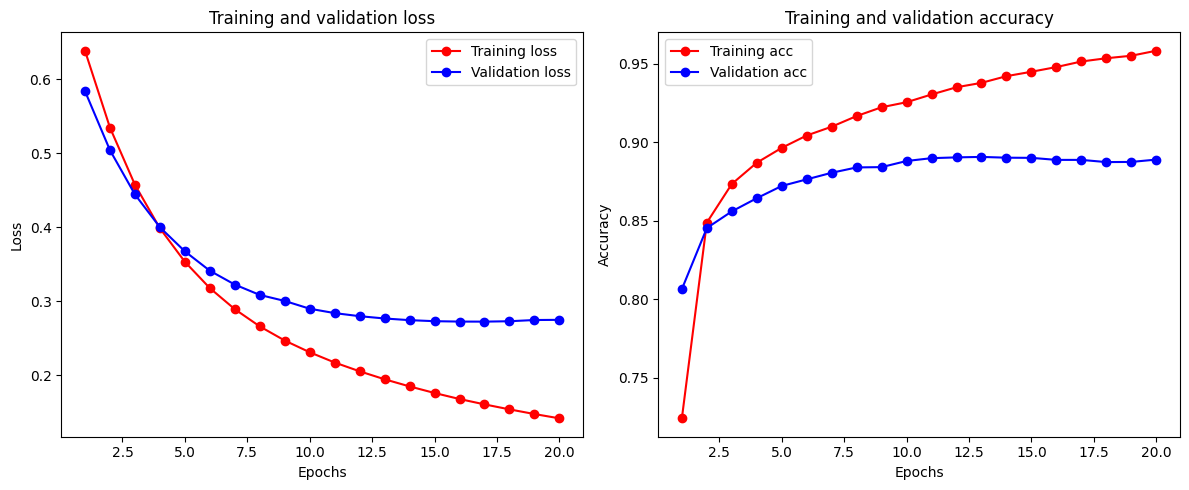

In [ ]:
# Define model
model = tf.keras.models.Sequential([
tf.keras.layers.Dense(4, activation='relu', input_shape=(10000,), kernel_regularizer=regularizers.l2(0.00001)),
tf.keras.layers.Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l2(0.00001))
])

# Compile model
model.compile(optimizer=optimizers.RMSprop(learning_rate=0.0005),
              loss=losses.binary_crossentropy,
              metrics=['accuracy'])

# Train model and store history
history = train_and_save_history(model, partial_x_train, partial_y_train, x_val, y_val, 20, 256, all_histories)

# Evaluate model performance
results = model.evaluate(x_test, y_test)
print(f"Test Loss: {results[0]}, Test Accuracy: {results[1]}")

# Plot both training and validation loss and accuracy of the last training
plot_history(all_histories[-1])

# Performance_Model_04-6

In [ ]:
df = generate_performance_dataframe(model, history)
print(df)

clean_mem()

        Model  Layers  Units      LR  mom    L1       L2 Dropout  Min.V.Loss  \
0  sequential       2      4  0.0005  0.0  None  0.00001    None    0.272557   

   Max.V.Acc  
0     0.8907  


# Model_04-6 Summary:  
The loss values ​​of Model_04-6 gradually decrease during the training process, but the loss value decreases more smoothly. Furthermore, Model_04-6 validation accuracy value is slightly higher than Model_04. On the training set, the accuracy of training result 2 (88.30%) is slightly higher than training result 1 (87.84%), suggesting the idea that L2 regularization helps control the complexity of the model to avoid overfitting. Therefore, Model_04-6 will be kept.


# L1+L2 regularization(Model_04-7) tuning summary:  
The overall Moel_04-7 performance on test loss, test accuracy, and maximum validation accuracy is slightly better than Model_04-6, even though both models show the signs of overfitting. Therefore,  
### we use Model_04-7 for tuning dropout.  

# Model_04-7:  
layer=2  
epochs=20  
batch_size=256  
learning rate=0.0005(Learning rate tuning winner)  
L1=0.00001(from Model_04-3)  
L2=0.00001(from Model_04-6)

Epoch 1/20
59/59 [==============================] - 5s 71ms/step - loss: 0.5749 - accuracy: 0.7637 - val_loss: 0.4957 - val_accuracy: 0.8370
Epoch 2/20
59/59 [==============================] - 1s 19ms/step - loss: 0.4318 - accuracy: 0.8691 - val_loss: 0.4095 - val_accuracy: 0.8650
Epoch 3/20
59/59 [==============================] - 1s 19ms/step - loss: 0.3545 - accuracy: 0.8953 - val_loss: 0.3593 - val_accuracy: 0.8781
Epoch 4/20
59/59 [==============================] - 1s 21ms/step - loss: 0.3052 - accuracy: 0.9100 - val_loss: 0.3294 - val_accuracy: 0.8829
Epoch 5/20
59/59 [==============================] - 2s 29ms/step - loss: 0.2706 - accuracy: 0.9173 - val_loss: 0.3097 - val_accuracy: 0.8862
Epoch 6/20
59/59 [==============================] - 2s 29ms/step - loss: 0.2445 - accuracy: 0.9244 - val_loss: 0.2991 - val_accuracy: 0.8873
Epoch 7/20
59/59 [==============================] - 2s 27ms/step - loss: 0.2238 - accuracy: 0.9312 - val_loss: 0.2873 - val_accuracy: 0.8912
Epoch 8/20
59

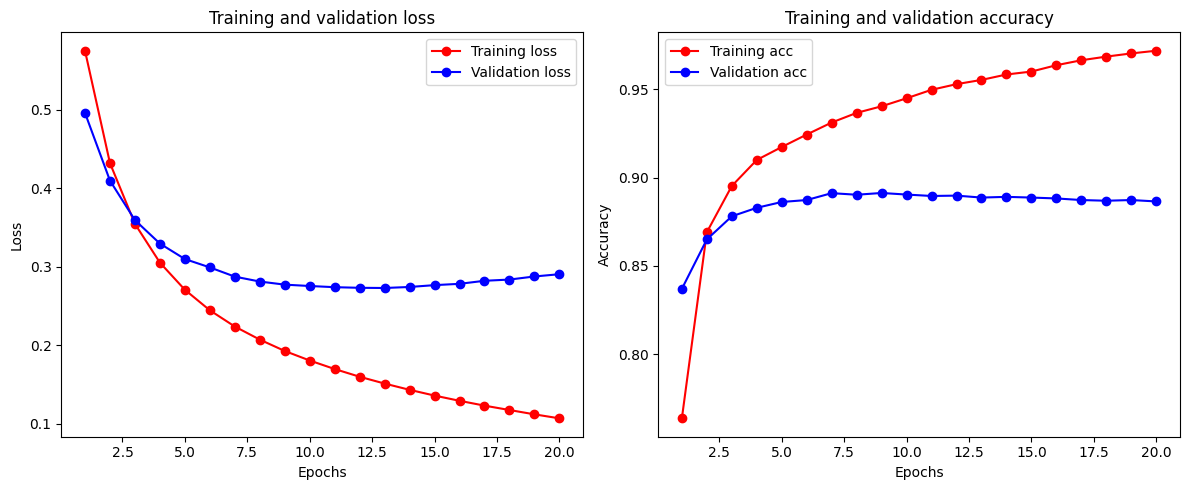

In [ ]:
# Define model
model = tf.keras.models.Sequential([
tf.keras.layers.Dense(4, activation='relu', input_shape=(10000,), kernel_regularizer=regularizers.l2(0.00001)),
tf.keras.layers.Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l1_l2(l1=0.00001, l2=0.00001))
])

# Compile model
model.compile(optimizer=optimizers.RMSprop(learning_rate=0.0005),
              loss=losses.binary_crossentropy,
              metrics=['accuracy'])

# Train model and store history
history = train_and_save_history(model, partial_x_train, partial_y_train, x_val, y_val, 20, 256, all_histories)

# Evaluate model performance
results = model.evaluate(x_test, y_test)
print(f"Test Loss: {results[0]}, Test Accuracy: {results[1]}")

# Plot both training and validation loss and accuracy of the last training
plot_history(all_histories[-1])

# Performance_Model_04-7

In [ ]:
df = generate_performance_dataframe(model, history)
print(df)

clean_mem()

        Model  Layers  Units      LR  mom       L1       L2 Dropout  \
0  sequential       2      4  0.0005  0.0  0.00001  0.00001    None   

   Min.V.Loss  Max.V.Acc  
0    0.272886     0.8913  


 # Dropout tuning summary:  
Four Models of results as below and all of them are showing overfitting:

Model_04-8, dropout=0.5:  
Test Loss: 0.2956584393978119, Test Accuracy: 0.8817600011825562  
Min.V.Loss: 0.280491,  Max.V.Acc:0.8893  

Model_04-9, dropout=0.1:  
Test Loss: 0.2943788170814514, Test Accuracy: 0.8817200064659119
Min.V.Loss: 0.271153,  Max.V.Acc:0.8915  

Model_04-10, dropout=0.05:  
Test Loss: 0.29925766587257385, Test Accuracy: 0.8803600072860718
Min.V.Loss: 0.270322,  Max.V.Acc:0.8916  

Model_04-11, dropout=0.01:  
Test Loss: 0.2997041642665863, Test Accuracy: 0.8817600011825562
Min.V.Loss: 0.272967,  Max.V.Acc:0.8900  

Apparently, all values are close, so we choose based on the maximum validation accuracy, 0.8916.  

## Hence, Model_4-10 is our final model.  
However, Model_4-10 also shows signs of overfitting, so we will further use EarlyStopping based on Model_4-10 as Model_4-12.

# Model_04-8:  
layer=3  
epochs=20  
batch_size=256  
learning rate=0.0005(Learning rate tuning winner)  
L1=0.00001(from Model_04-7)  
L2=0.00001(from Model_04-7)  
dropout=0.5(new)

Epoch 1/20
59/59 [==============================] - 3s 36ms/step - loss: 0.6483 - accuracy: 0.5913 - val_loss: 0.5707 - val_accuracy: 0.8069
Epoch 2/20
59/59 [==============================] - 1s 18ms/step - loss: 0.5451 - accuracy: 0.6973 - val_loss: 0.4761 - val_accuracy: 0.8511
Epoch 3/20
59/59 [==============================] - 1s 18ms/step - loss: 0.4863 - accuracy: 0.7367 - val_loss: 0.4222 - val_accuracy: 0.8696
Epoch 4/20
59/59 [==============================] - 1s 17ms/step - loss: 0.4435 - accuracy: 0.7707 - val_loss: 0.3863 - val_accuracy: 0.8760
Epoch 5/20
59/59 [==============================] - 1s 18ms/step - loss: 0.4182 - accuracy: 0.7818 - val_loss: 0.3630 - val_accuracy: 0.8818
Epoch 6/20
59/59 [==============================] - 1s 18ms/step - loss: 0.3905 - accuracy: 0.7953 - val_loss: 0.3473 - val_accuracy: 0.8830
Epoch 7/20
59/59 [==============================] - 1s 24ms/step - loss: 0.3786 - accuracy: 0.7993 - val_loss: 0.3315 - val_accuracy: 0.8846
Epoch 8/20
59

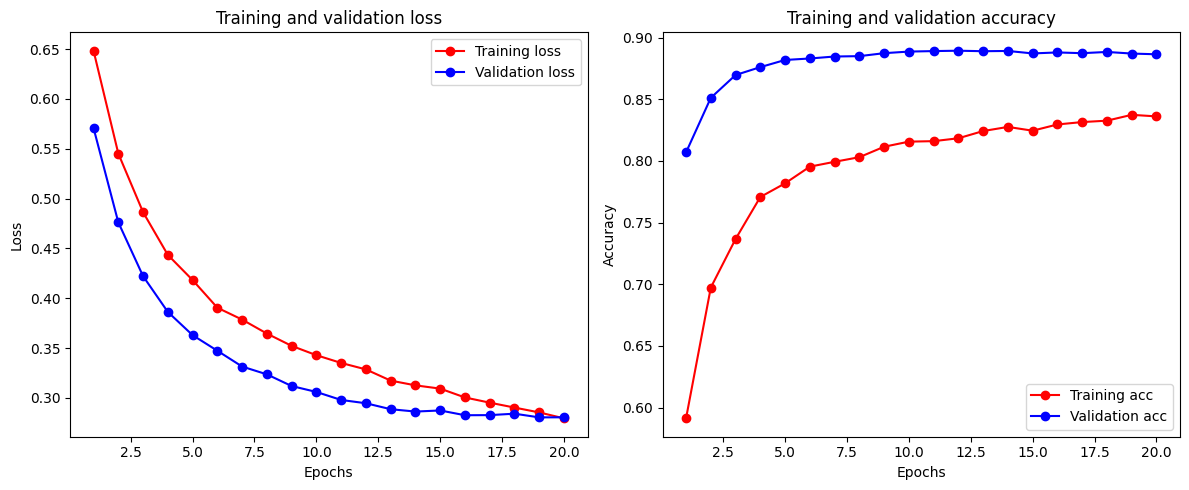

In [ ]:
# Define model
model = tf.keras.models.Sequential([
tf.keras.layers.Dense(4, activation='relu', input_shape=(10000,), kernel_regularizer=regularizers.l2(0.00001)),
tf.keras.layers.Dropout(0.5),
tf.keras.layers.Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l1_l2(l1=0.00001, l2=0.00001))
])

# Compile model
model.compile(optimizer=optimizers.RMSprop(learning_rate=0.0005),
              loss=losses.binary_crossentropy,
              metrics=['accuracy'])

# Train model and store history
history = train_and_save_history(model, partial_x_train, partial_y_train, x_val, y_val, 20, 256, all_histories)

# Evaluate model performance
results = model.evaluate(x_test, y_test)
print(f"Test Loss: {results[0]}, Test Accuracy: {results[1]}")

# Plot both training and validation loss and accuracy of the last training
plot_history(all_histories[-1])

# Performance_Model_04-8

In [ ]:
df = generate_performance_dataframe(model, history)
print(df)

clean_mem()

          Model  Layers  Units      LR  mom       L1       L2  Dropout  \
0  sequential_3       3      4  0.0005  0.0  0.00001  0.00001      0.5   

   Min.V.Loss  Max.V.Acc  
0    0.280491     0.8893  


# Model_04-9:  
layer=3  
epochs=20  
batch_size=256  
learning rate=0.0005(Learning rate tuning winner)  
L1=0.00001(from Model_04-7)  
L2=0.00001(from Model_04-7)  
dropout=0.1(new)

Epoch 1/20
59/59 [==============================] - 5s 67ms/step - loss: 0.5973 - accuracy: 0.7431 - val_loss: 0.5259 - val_accuracy: 0.8301
Epoch 2/20
59/59 [==============================] - 2s 32ms/step - loss: 0.4733 - accuracy: 0.8382 - val_loss: 0.4400 - val_accuracy: 0.8594
Epoch 3/20
59/59 [==============================] - 2s 34ms/step - loss: 0.4005 - accuracy: 0.8646 - val_loss: 0.3873 - val_accuracy: 0.8711
Epoch 4/20
59/59 [==============================] - 1s 19ms/step - loss: 0.3559 - accuracy: 0.8811 - val_loss: 0.3567 - val_accuracy: 0.8774
Epoch 5/20
59/59 [==============================] - 1s 18ms/step - loss: 0.3169 - accuracy: 0.8925 - val_loss: 0.3301 - val_accuracy: 0.8834
Epoch 6/20
59/59 [==============================] - 2s 29ms/step - loss: 0.2881 - accuracy: 0.9029 - val_loss: 0.3131 - val_accuracy: 0.8856
Epoch 7/20
59/59 [==============================] - 2s 30ms/step - loss: 0.2685 - accuracy: 0.9086 - val_loss: 0.3004 - val_accuracy: 0.8882
Epoch 8/20
59

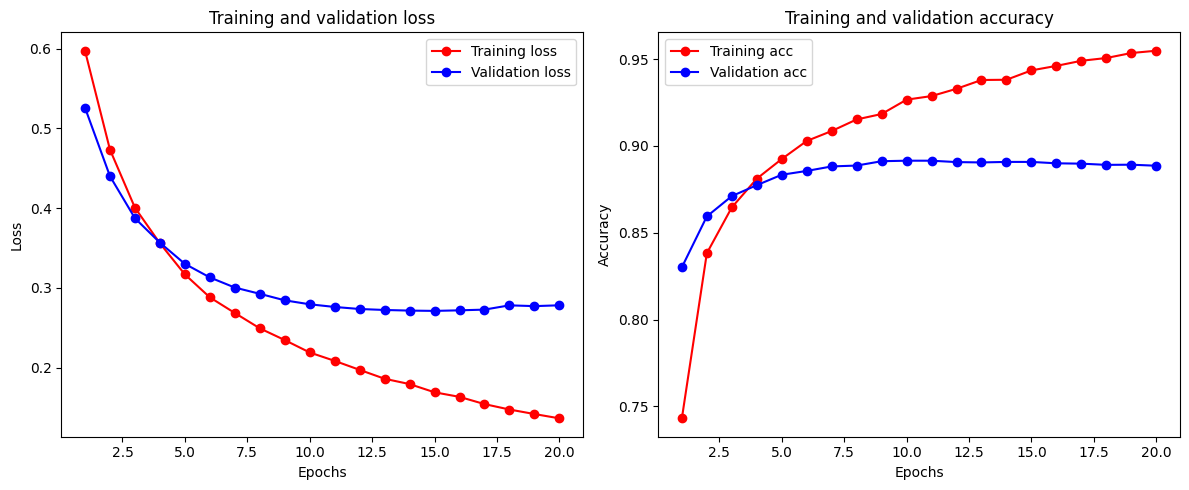

In [ ]:
# Define model
model = tf.keras.models.Sequential([
tf.keras.layers.Dense(4, activation='relu', input_shape=(10000,), kernel_regularizer=regularizers.l2(0.00001)),
tf.keras.layers.Dropout(0.1),
tf.keras.layers.Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l1_l2(l1=0.00001, l2=0.00001))
])

# Compile model
model.compile(optimizer=optimizers.RMSprop(learning_rate=0.0005),
              loss=losses.binary_crossentropy,
              metrics=['accuracy'])

# Train model and store history
history = train_and_save_history(model, partial_x_train, partial_y_train, x_val, y_val, 20, 256, all_histories)

# Evaluate model performance
results = model.evaluate(x_test, y_test)
print(f"Test Loss: {results[0]}, Test Accuracy: {results[1]}")

# Plot both training and validation loss and accuracy of the last training
plot_history(all_histories[-1])

# Performance_Model_04-9

In [ ]:
df = generate_performance_dataframe(model, history)
print(df)

clean_mem()

        Model  Layers  Units      LR  mom       L1       L2  Dropout  \
0  sequential       3      4  0.0005  0.0  0.00001  0.00001      0.1   

   Min.V.Loss  Max.V.Acc  
0    0.271153     0.8915  


# Model_04-10:  
layer=3  
epochs=20  
batch_size=256  
learning rate=0.0005(Learning rate tuning winner)  
L1=0.00001(from Model_04-7)  
L2=0.00001(from Model_04-7)  
dropout=0.05(new)

Epoch 1/20
59/59 [==============================] - 4s 49ms/step - loss: 0.5934 - accuracy: 0.7534 - val_loss: 0.5185 - val_accuracy: 0.8280
Epoch 2/20
59/59 [==============================] - 1s 19ms/step - loss: 0.4607 - accuracy: 0.8555 - val_loss: 0.4310 - val_accuracy: 0.8615
Epoch 3/20
59/59 [==============================] - 2s 28ms/step - loss: 0.3849 - accuracy: 0.8774 - val_loss: 0.3786 - val_accuracy: 0.8734
Epoch 4/20
59/59 [==============================] - 2s 27ms/step - loss: 0.3351 - accuracy: 0.8911 - val_loss: 0.3469 - val_accuracy: 0.8795
Epoch 5/20
59/59 [==============================] - 1s 18ms/step - loss: 0.2996 - accuracy: 0.9016 - val_loss: 0.3220 - val_accuracy: 0.8862
Epoch 6/20
59/59 [==============================] - 1s 18ms/step - loss: 0.2723 - accuracy: 0.9102 - val_loss: 0.3057 - val_accuracy: 0.8883
Epoch 7/20
59/59 [==============================] - 1s 18ms/step - loss: 0.2515 - accuracy: 0.9168 - val_loss: 0.2938 - val_accuracy: 0.8916
Epoch 8/20
59

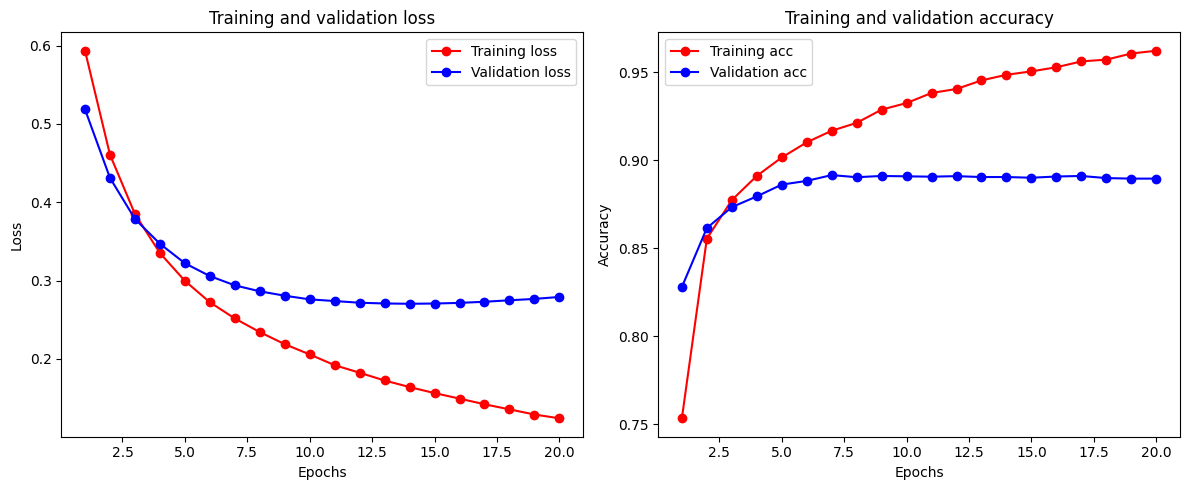

In [ ]:
# Define model
model = tf.keras.models.Sequential([
tf.keras.layers.Dense(4, activation='relu', input_shape=(10000,), kernel_regularizer=regularizers.l2(0.00001)),
tf.keras.layers.Dropout(0.05),
tf.keras.layers.Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l1_l2(l1=0.00001, l2=0.00001))
])

# Compile model
model.compile(optimizer=optimizers.RMSprop(learning_rate=0.0005),
              loss=losses.binary_crossentropy,
              metrics=['accuracy'])

# Train model and store history
history = train_and_save_history(model, partial_x_train, partial_y_train, x_val, y_val, 20, 256, all_histories)

# Evaluate model performance
results = model.evaluate(x_test, y_test)
print(f"Test Loss: {results[0]}, Test Accuracy: {results[1]}")

# Plot both training and validation loss and accuracy of the last training
plot_history(all_histories[-1])

# Performance_Model_04-10

In [ ]:
df = generate_performance_dataframe(model, history)
print(df)

clean_mem()

        Model  Layers  Units      LR  mom       L1       L2  Dropout  \
0  sequential       3      4  0.0005  0.0  0.00001  0.00001     0.05   

   Min.V.Loss  Max.V.Acc  
0    0.270322     0.8916  


# Model_04-11:    
layer=3  
epochs=20  
batch_size=256  
learning rate=0.0005(Learning rate tuning winner)  
L1=0.00001(from Model_04-7)  
L2=0.00001(from Model_04-7)  
dropout=0.01(new)

Epoch 1/20
59/59 [==============================] - 3s 41ms/step - loss: 0.5999 - accuracy: 0.7640 - val_loss: 0.5296 - val_accuracy: 0.8357
Epoch 2/20
59/59 [==============================] - 2s 30ms/step - loss: 0.4724 - accuracy: 0.8620 - val_loss: 0.4457 - val_accuracy: 0.8588
Epoch 3/20
59/59 [==============================] - 2s 29ms/step - loss: 0.3956 - accuracy: 0.8834 - val_loss: 0.3923 - val_accuracy: 0.8697
Epoch 4/20
59/59 [==============================] - 1s 25ms/step - loss: 0.3441 - accuracy: 0.8953 - val_loss: 0.3571 - val_accuracy: 0.8773
Epoch 5/20
59/59 [==============================] - 2s 27ms/step - loss: 0.3053 - accuracy: 0.9063 - val_loss: 0.3306 - val_accuracy: 0.8826
Epoch 6/20
59/59 [==============================] - 1s 23ms/step - loss: 0.2767 - accuracy: 0.9133 - val_loss: 0.3129 - val_accuracy: 0.8867
Epoch 7/20
59/59 [==============================] - 1s 17ms/step - loss: 0.2539 - accuracy: 0.9207 - val_loss: 0.2998 - val_accuracy: 0.8873
Epoch 8/20
59

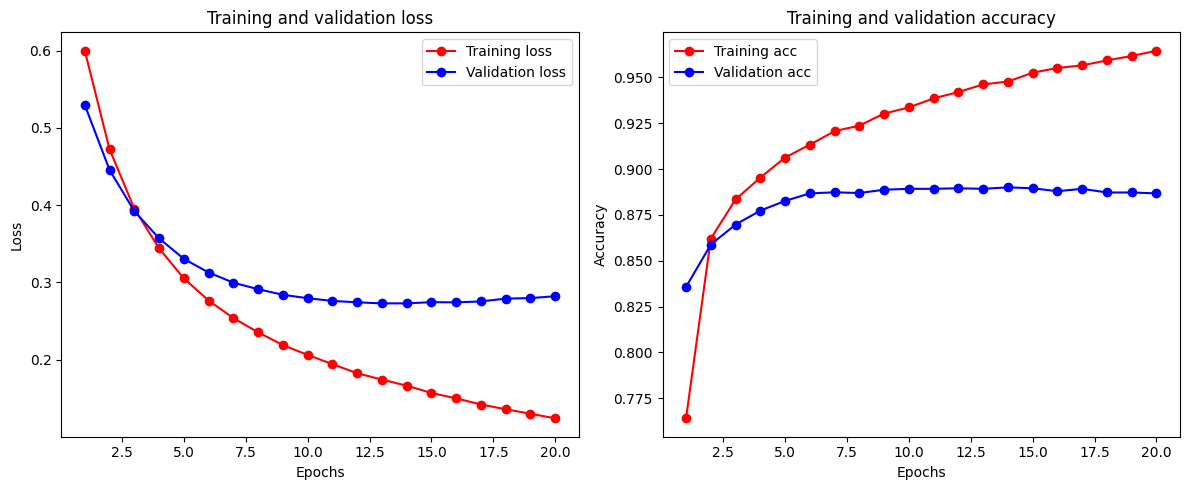

In [ ]:
# Define model
model = tf.keras.models.Sequential([
tf.keras.layers.Dense(4, activation='relu', input_shape=(10000,), kernel_regularizer=regularizers.l2(0.00001)),
tf.keras.layers.Dropout(0.01),
tf.keras.layers.Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l1_l2(l1=0.00001, l2=0.00001))
])

# Compile model
model.compile(optimizer=optimizers.RMSprop(learning_rate=0.0005),
              loss=losses.binary_crossentropy,
              metrics=['accuracy'])

# Train model and store history
history = train_and_save_history(model, partial_x_train, partial_y_train, x_val, y_val, 20, 256, all_histories)

# Evaluate model performance
results = model.evaluate(x_test, y_test)
print(f"Test Loss: {results[0]}, Test Accuracy: {results[1]}")

# Plot both training and validation loss and accuracy of the last training
plot_history(all_histories[-1])

# Performance_Model_04-11

In [ ]:
df = generate_performance_dataframe(model, history)
print(df)

clean_mem()

        Model  Layers  Units      LR  mom       L1       L2  Dropout  \
0  sequential       3      4  0.0005  0.0  0.00001  0.00001     0.01   

   Min.V.Loss  Max.V.Acc  
0    0.272967       0.89  


# Model_4-12(earlystopping)
layer=3  
epochs=20  
batch_size=256  
learning rate=0.0005(Learning rate tuning winner)  
L1=0.00001(from Model_04-7)  
L2=0.00001(from Model_04-7)  
dropout=0.05(from Modeul_04-10)  
earlystopping: patience=4


Epoch 1/20
59/59 [==============================] - 5s 71ms/step - loss: 0.6107 - accuracy: 0.7340 - val_loss: 0.5368 - val_accuracy: 0.8378
Epoch 2/20
59/59 [==============================] - 1s 23ms/step - loss: 0.4822 - accuracy: 0.8460 - val_loss: 0.4494 - val_accuracy: 0.8598
Epoch 3/20
59/59 [==============================] - 1s 25ms/step - loss: 0.4059 - accuracy: 0.8653 - val_loss: 0.3945 - val_accuracy: 0.8707
Epoch 4/20
59/59 [==============================] - 1s 18ms/step - loss: 0.3558 - accuracy: 0.8817 - val_loss: 0.3589 - val_accuracy: 0.8782
Epoch 5/20
59/59 [==============================] - 1s 18ms/step - loss: 0.3178 - accuracy: 0.8934 - val_loss: 0.3331 - val_accuracy: 0.8824
Epoch 6/20
59/59 [==============================] - 1s 18ms/step - loss: 0.2899 - accuracy: 0.9033 - val_loss: 0.3148 - val_accuracy: 0.8863
Epoch 7/20
59/59 [==============================] - 1s 18ms/step - loss: 0.2658 - accuracy: 0.9099 - val_loss: 0.3020 - val_accuracy: 0.8882
Epoch 8/20
59

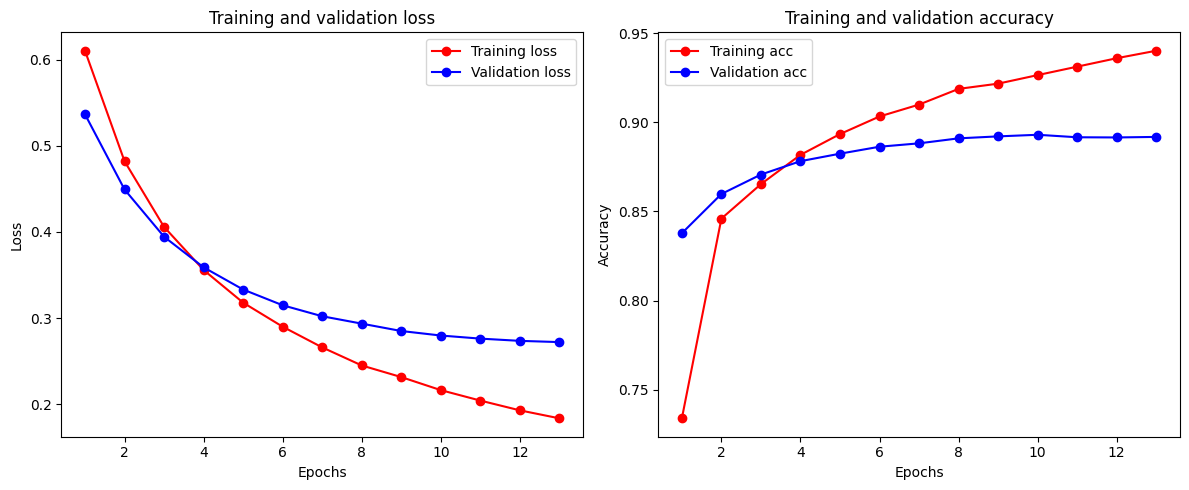

In [ ]:
# idea comes from Jérémie walk through about IMDB dataset, so I ask ChatGPT Plugins if there's any automation early stopping test for machine learning
# codes are generated by ChatGPT Plugins, 14/11
# prompt: copy and past one of the model code and ask it to use automation early stopping.

# Define model
model = tf.keras.models.Sequential([
tf.keras.layers.Dense(4, activation='relu', input_shape=(10000,), kernel_regularizer=regularizers.l2(0.00001)),
tf.keras.layers.Dropout(0.05),
tf.keras.layers.Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l1_l2(l1=0.00001, l2=0.00001))
])

# Compile model
model.compile(optimizer=optimizers.RMSprop(learning_rate=0.0005),
              loss=losses.binary_crossentropy,
              metrics=['accuracy'])

# Set EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)

# Train the model and save history
# Make sure the return value is assigned to the history variable and add an early_stopping callback
history = train_and_save_history(model, partial_x_train, partial_y_train, x_val, y_val, 20, 256, all_histories, callbacks=[early_stopping])

# Evaluate model performance
results = model.evaluate(x_test, y_test)
print(f"Test Loss: {results[0]}, Test Accuracy: {results[1]}")

# Plot both training and validation loss and accuracy of the last training
plot_history(all_histories[-1])

In [ ]:
df = generate_performance_dataframe(model, history)
print(df)

clean_mem()

          Model  Layers  Units      LR  mom       L1       L2  Dropout  \
0  sequential_4       3      4  0.0005  0.0  0.00001  0.00001     0.05   

   Min.V.Loss  Max.V.Acc  
0    0.271991      0.893  


# Final Model

In [ ]:
# Define model without validation
def train_and_save_history_final(model, x_train, y_train, epochs, batch_size, all_histories, callbacks=None):
    history = model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, callbacks=callbacks)
        all_histories.append(history)
    return history

model = tf.keras.models.Sequential([
tf.keras.layers.Dense(4, activation='relu', input_shape=(10000,), kernel_regularizer=regularizers.l2(0.00001)),
tf.keras.layers.Dropout(0.05),
tf.keras.layers.Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l1_l2(l1=0.00001, l2=0.00001))
])

# Compile model
model.compile(optimizer=optimizers.RMSprop(learning_rate=0.0005),
              loss=losses.binary_crossentropy,
              metrics=['accuracy'])

# Train the model and save history
# Make sure the return value is assigned to the history variable and add an early_stopping callback
history = train_and_save_history_final(model, x_train, y_train, epochs=13, batch_size=256, all_histories=all_histories)



Epoch 1/13
98/98 [==============================] - 8s 12ms/step - loss: 0.5267 - accuracy: 0.7914
Epoch 2/13
98/98 [==============================] - 1s 10ms/step - loss: 0.3719 - accuracy: 0.8718
Epoch 3/13
98/98 [==============================] - 1s 8ms/step - loss: 0.3044 - accuracy: 0.8956
Epoch 4/13
98/98 [==============================] - 1s 8ms/step - loss: 0.2661 - accuracy: 0.9086
Epoch 5/13
98/98 [==============================] - 1s 8ms/step - loss: 0.2404 - accuracy: 0.9153
Epoch 6/13
98/98 [==============================] - 1s 9ms/step - loss: 0.2210 - accuracy: 0.9208
Epoch 7/13
98/98 [==============================] - 1s 8ms/step - loss: 0.2064 - accuracy: 0.9268
Epoch 8/13
98/98 [==============================] - 1s 9ms/step - loss: 0.1940 - accuracy: 0.9326
Epoch 9/13
98/98 [==============================] - 1s 8ms/step - loss: 0.1821 - accuracy: 0.9376
Epoch 10/13
98/98 [==============================] - 1s 9ms/step - loss: 0.1729 - accuracy: 0.9405
Epoch 11/13
98/98

In [ ]:
# Evaluate model performance
results = model.evaluate(x_test, y_test)
print(f"Test Loss: {results[0]}, Test Accuracy: {results[1]}")

782/782 [==============================] - 2s 3ms/step - loss: 0.2859 - accuracy: 0.8856
Test Loss: 0.28594017028808594, Test Accuracy: 0.885640025138855


In [ ]:
clean_mem()

# Conclusion:  
The final model result on test set accuracy indicates that the loss is steady and gradually going down, and the accuracy reaches a good value(0.9483) among all training models. From this research, we can refer to the "Learning Rate" as the key point, at least for the RMSProp optimizer. I'll say we are wise(lucky?) that we are so close to the best result at the first step since we followed the DLWP at the very beginning. However, the performance on the test set doesn't perform well at the same level. It is worth it to discuss the possible reasons.  

From the dataset accurate aspect:
1. The IMDB datasets had been randomized when it was released, so this is not the whether the dataset split randomly problem.

2. The datasets need more preprocess. According to the post "IMDB sentiment Classifier ~ 97% accuracy model" on Kaggle, perhaps using glove embeddings and LSTM layers would be helpful, but that's not cover in our learning scope for CW 1.

3. Data leakage. Our model has been spliti into 3 different parts correctly and independently, hence we could exclude this reason.

From model aspect:
1. The model reaches its limit. Because our model is relatively simple and contains only 2 layers and 4 units, maybe it is unable to learn from or perform a more complicated classification mission.

2. Base on Model_04-12, choosing a different epoch on final test dasets. We can found that the early sign of overfitting on epoch 4, not epoch 13. Moreover, the maximum validation accuracy happened at epoch 10, perhpas this is also a good point.

Therefore, maybe learning rate the key of machine learning, but the dataset could be much better preprocessed before we start to train a model. Furtheromre, if we find an ideal learning rate for our model, maybe add more layers and units could help improve the performance.



---



---



Uphold the fearless spirit of a brave warrior, just as we defeat the chilling Friday morning, we shall do more experiments.

# 11. Further test

## Model_04
For reference and comparison.

In [ ]:
# Define model
model = tf.keras.models.Sequential([
tf.keras.layers.Dense(4, activation='relu', input_shape=(10000,)),
tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile model
model.compile(optimizer=optimizers.RMSprop(learning_rate=0.0005),
              loss=losses.binary_crossentropy,
              metrics=['accuracy'])

# Train model and store history
history = train_and_save_history(model, partial_x_train, partial_y_train, x_val, y_val, 20, 256, all_histories)

# Evaluate model performance
results = model.evaluate(x_test, y_test)
print(f"Test Loss: {results[0]}, Test Accuracy: {results[1]}")

# Plot both training and validation loss and accuracy of the last training
plot_history(all_histories[-1])

df = generate_performance_dataframe(model, history)
print(df)

clean_mem()

## Performance_Model_4

Min.V.Loss: 0.272541   
Max.V.Acc: 0.8906

## Model_04-10  
For reference and comparison.

In [ ]:
# Define model
model = tf.keras.models.Sequential([
tf.keras.layers.Dense(4, activation='relu', input_shape=(10000,), kernel_regularizer=regularizers.l2(0.00001)),
tf.keras.layers.Dropout(0.05),
tf.keras.layers.Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l1_l2(l1=0.00001, l2=0.00001))
])

# Compile model
model.compile(optimizer=optimizers.RMSprop(learning_rate=0.0005),
              loss=losses.binary_crossentropy,
              metrics=['accuracy'])

# Train model and store history
history = train_and_save_history(model, partial_x_train, partial_y_train, x_val, y_val, 20, 256, all_histories)

# Evaluate model performance
results = model.evaluate(x_test, y_test)
print(f"Test Loss: {results[0]}, Test Accuracy: {results[1]}")

# Plot both training and validation loss and accuracy of the last training
plot_history(all_histories[-1])

df = generate_performance_dataframe(model, history)
print(df)

clean_mem()

## Performance_Model_4-10

Min.V.Loss: 0.270322  

Max.V.Acc: 0.8916
         



---


# MSE loss function summary:  
MSE(Mean Squared Error) is a commonly used loss function, usually and especially in regression problems. We can easily find that the loss is significantly decreased, which fits the feature of MSE. But the overfitting still exist.

## Model_04_MSE

Epoch 1/20
59/59 [==============================] - 4s 48ms/step - loss: 0.1950 - accuracy: 0.7695 - val_loss: 0.1598 - val_accuracy: 0.8374
Epoch 2/20
59/59 [==============================] - 1s 18ms/step - loss: 0.1347 - accuracy: 0.8729 - val_loss: 0.1276 - val_accuracy: 0.8676
Epoch 3/20
59/59 [==============================] - 1s 18ms/step - loss: 0.1071 - accuracy: 0.8975 - val_loss: 0.1118 - val_accuracy: 0.8734
Epoch 4/20
59/59 [==============================] - 1s 17ms/step - loss: 0.0906 - accuracy: 0.9115 - val_loss: 0.1025 - val_accuracy: 0.8798
Epoch 5/20
59/59 [==============================] - 1s 18ms/step - loss: 0.0796 - accuracy: 0.9215 - val_loss: 0.0960 - val_accuracy: 0.8865
Epoch 6/20
59/59 [==============================] - 1s 18ms/step - loss: 0.0714 - accuracy: 0.9283 - val_loss: 0.0913 - val_accuracy: 0.8908
Epoch 7/20
59/59 [==============================] - 1s 18ms/step - loss: 0.0650 - accuracy: 0.9353 - val_loss: 0.0886 - val_accuracy: 0.8896
Epoch 8/20
59

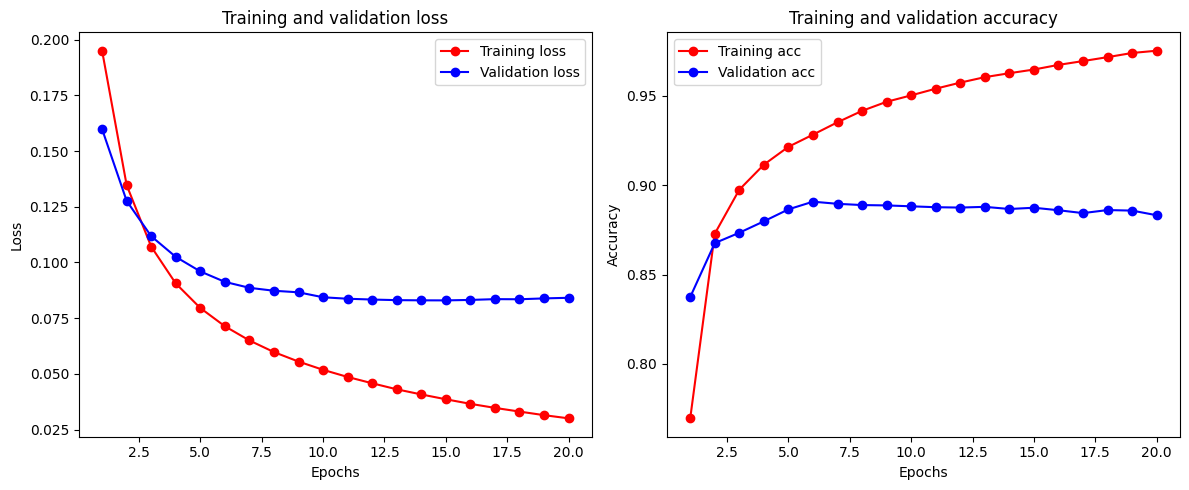

          Model  Layers  Units      LR  Momentum    L1    L2 Dropout  \
0  sequential_1       2      4  0.0005       0.0  None  None    None   

   Min.V.Loss  Max.V.Acc  
0    0.082981     0.8908  


In [ ]:
# Define model
model = tf.keras.models.Sequential([
tf.keras.layers.Dense(4, activation='relu', input_shape=(10000,)),
tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile model
model.compile(optimizer=optimizers.RMSprop(learning_rate=0.0005),
              loss='mean_squared_error',  # Changed to MSE
              metrics=['accuracy'])

# Train model and store history
history = train_and_save_history(model, partial_x_train, partial_y_train, x_val, y_val, 20, 256, all_histories)

# Evaluate model performance
results = model.evaluate(x_test, y_test)
print(f"Test Loss: {results[0]}, Test Accuracy: {results[1]}")

# Plot both training and validation loss and accuracy of the last training
plot_history(all_histories[-1])

df = generate_performance_dataframe(model, history)
print(df)

clean_mem()

## Model_4-10_MSE

Epoch 1/20
59/59 [==============================] - 3s 41ms/step - loss: 0.2103 - accuracy: 0.7100 - val_loss: 0.1793 - val_accuracy: 0.8250
Epoch 2/20
59/59 [==============================] - 2s 29ms/step - loss: 0.1560 - accuracy: 0.8498 - val_loss: 0.1435 - val_accuracy: 0.8613
Epoch 3/20
59/59 [==============================] - 1s 20ms/step - loss: 0.1273 - accuracy: 0.8753 - val_loss: 0.1242 - val_accuracy: 0.8742
Epoch 4/20
59/59 [==============================] - 1s 18ms/step - loss: 0.1083 - accuracy: 0.8917 - val_loss: 0.1121 - val_accuracy: 0.8789
Epoch 5/20
59/59 [==============================] - 1s 18ms/step - loss: 0.0970 - accuracy: 0.8999 - val_loss: 0.1039 - val_accuracy: 0.8843
Epoch 6/20
59/59 [==============================] - 1s 18ms/step - loss: 0.0882 - accuracy: 0.9082 - val_loss: 0.0982 - val_accuracy: 0.8860
Epoch 7/20
59/59 [==============================] - 2s 29ms/step - loss: 0.0817 - accuracy: 0.9121 - val_loss: 0.0943 - val_accuracy: 0.8893
Epoch 8/20
59

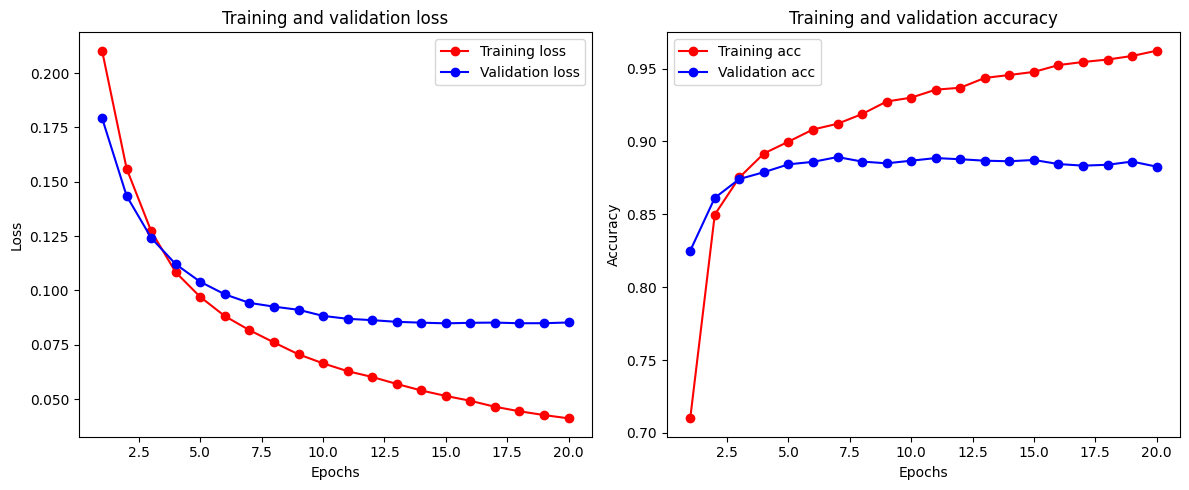

        Model  Layers  Units      LR  Momentum       L1       L2  Dropout  \
0  sequential       3      4  0.0005       0.0  0.00001  0.00001     0.05   

   Min.V.Loss  Max.V.Acc  
0    0.084841     0.8893  


In [ ]:
# Define model
model = tf.keras.models.Sequential([
tf.keras.layers.Dense(4, activation='relu', input_shape=(10000,), kernel_regularizer=regularizers.l2(0.00001)),
tf.keras.layers.Dropout(0.05),
tf.keras.layers.Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l1_l2(l1=0.00001, l2=0.00001))
])

# Compile model
model.compile(optimizer=optimizers.RMSprop(learning_rate=0.0005),
              loss='mean_squared_error',  # Changed to MSE
              metrics=['accuracy'])

# Train model and store history
history = train_and_save_history(model, partial_x_train, partial_y_train, x_val, y_val, 20, 256, all_histories)

# Evaluate model performance
results = model.evaluate(x_test, y_test)
print(f"Test Loss: {results[0]}, Test Accuracy: {results[1]}")

# Plot both training and validation loss and accuracy of the last training
plot_history(all_histories[-1])

df = generate_performance_dataframe(model, history)
print(df)

clean_mem()



---


# Tanh activation summary:  
### (Manual edit content, reference from ChatGPT Plugins)
The use cases of tanh are often in "hidden layers" of a neural network. It's particularly popular in tasks where normalization of input is beneficial, and in networks where negative output values can be meaningful. Moreover, the drawbacks include the vanishing gradient problem in deep networks. Due to the tanh function outputs values in the range of -1 to 1, meaning the output value could close toan  0. We can find that the loss decreases and the validation accuracy is higher than ReLU, so for simple networks, using tanh as avtivation could be an option, even though the overfitting occurs early.

## Model_04_tanh

Epoch 1/20
59/59 [==============================] - 3s 49ms/step - loss: 0.5518 - accuracy: 0.7807 - val_loss: 0.4696 - val_accuracy: 0.8463
Epoch 2/20
59/59 [==============================] - 2s 27ms/step - loss: 0.4051 - accuracy: 0.8797 - val_loss: 0.3904 - val_accuracy: 0.8746
Epoch 3/20
59/59 [==============================] - 1s 21ms/step - loss: 0.3345 - accuracy: 0.9031 - val_loss: 0.3497 - val_accuracy: 0.8759
Epoch 4/20
59/59 [==============================] - 1s 24ms/step - loss: 0.2897 - accuracy: 0.9160 - val_loss: 0.3237 - val_accuracy: 0.8819
Epoch 5/20
59/59 [==============================] - 2s 33ms/step - loss: 0.2582 - accuracy: 0.9254 - val_loss: 0.3063 - val_accuracy: 0.8886
Epoch 6/20
59/59 [==============================] - 2s 31ms/step - loss: 0.2340 - accuracy: 0.9335 - val_loss: 0.2922 - val_accuracy: 0.8912
Epoch 7/20
59/59 [==============================] - 1s 21ms/step - loss: 0.2145 - accuracy: 0.9395 - val_loss: 0.2843 - val_accuracy: 0.8916
Epoch 8/20
59

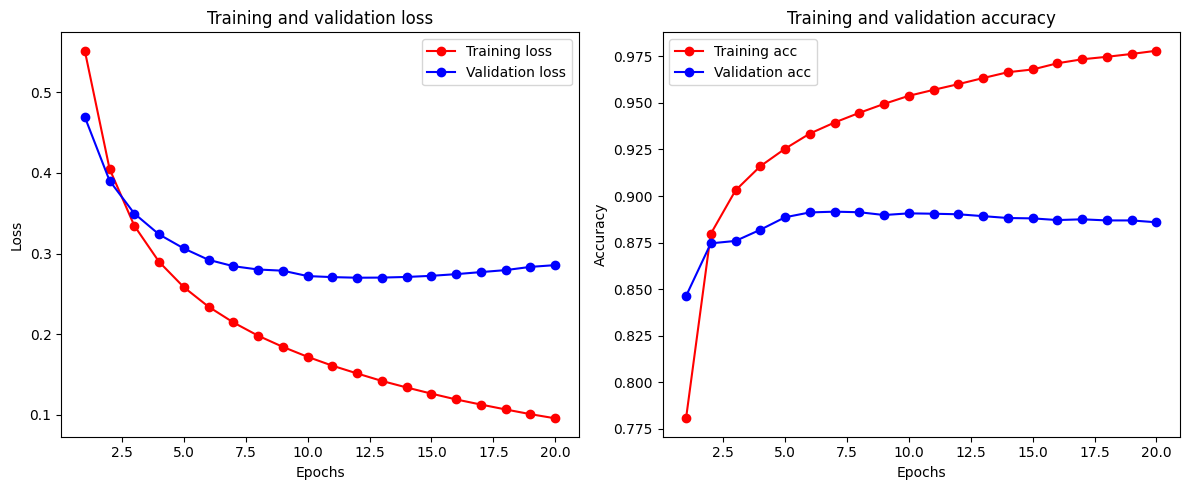

        Model  Layers  Units      LR  Momentum    L1    L2 Dropout  \
0  sequential       2      4  0.0005       0.0  None  None    None   

   Min.V.Loss  Max.V.Acc  
0    0.270008     0.8916  


In [ ]:
# Define model
model = tf.keras.models.Sequential([
tf.keras.layers.Dense(4, activation='tanh', input_shape=(10000,)),  # Changed to 'tanh'
tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile model
model.compile(optimizer=optimizers.RMSprop(learning_rate=0.0005),
              loss=losses.binary_crossentropy,
              metrics=['accuracy'])

# Train model and store history
history = train_and_save_history(model, partial_x_train, partial_y_train, x_val, y_val, 20, 256, all_histories)

# Evaluate model performance
results = model.evaluate(x_test, y_test)
print(f"Test Loss: {results[0]}, Test Accuracy: {results[1]}")

# Plot both training and validation loss and accuracy of the last training
plot_history(all_histories[-1])

df = generate_performance_dataframe(model, history)
print(df)

clean_mem()

## Model_4-10_tanh

Epoch 1/20
59/59 [==============================] - 3s 41ms/step - loss: 0.1916 - accuracy: 0.7685 - val_loss: 0.1572 - val_accuracy: 0.8423
Epoch 2/20
59/59 [==============================] - 1s 25ms/step - loss: 0.1330 - accuracy: 0.8745 - val_loss: 0.1267 - val_accuracy: 0.8675
Epoch 3/20
59/59 [==============================] - 1s 21ms/step - loss: 0.1073 - accuracy: 0.9003 - val_loss: 0.1120 - val_accuracy: 0.8764
Epoch 4/20
59/59 [==============================] - 1s 18ms/step - loss: 0.0913 - accuracy: 0.9143 - val_loss: 0.1031 - val_accuracy: 0.8795
Epoch 5/20
59/59 [==============================] - 1s 17ms/step - loss: 0.0807 - accuracy: 0.9242 - val_loss: 0.0967 - val_accuracy: 0.8851
Epoch 6/20
59/59 [==============================] - 1s 18ms/step - loss: 0.0729 - accuracy: 0.9303 - val_loss: 0.0920 - val_accuracy: 0.8877
Epoch 7/20
59/59 [==============================] - 1s 17ms/step - loss: 0.0664 - accuracy: 0.9378 - val_loss: 0.0893 - val_accuracy: 0.8892
Epoch 8/20
59

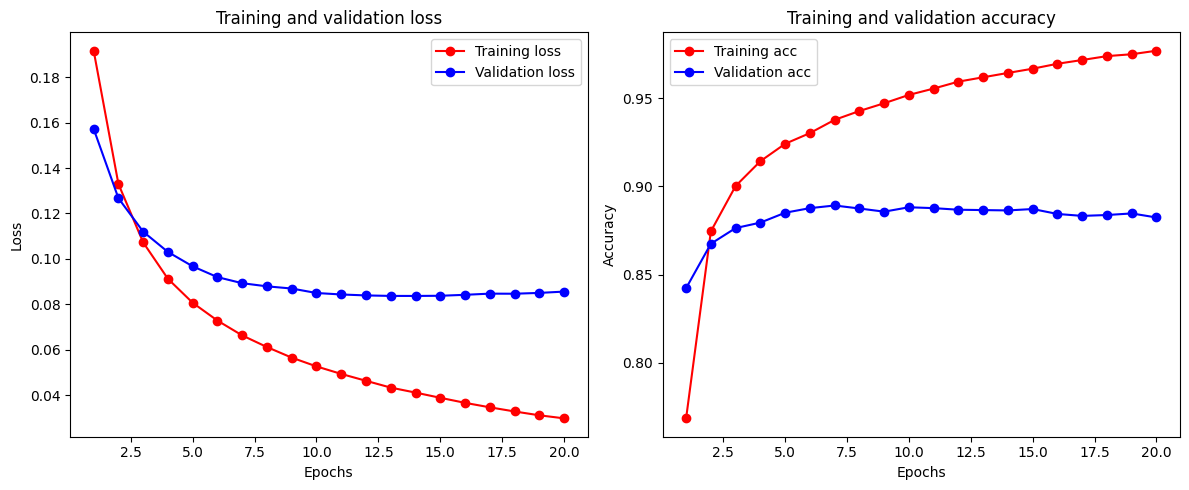

        Model  Layers  Units      LR  Momentum       L1       L2  Dropout  \
0  sequential       3      4  0.0005       0.0  0.00001  0.00001     0.05   

   Min.V.Loss  Max.V.Acc  
0    0.083723     0.8892  


In [ ]:
# Define model
model = tf.keras.models.Sequential([
tf.keras.layers.Dense(4, activation='tanh', input_shape=(10000,), kernel_regularizer=regularizers.l2(0.00001)), # Changed to 'tanh'
tf.keras.layers.Dropout(0.05),
tf.keras.layers.Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l1_l2(l1=0.00001, l2=0.00001))
])

# Compile model
model.compile(optimizer=optimizers.RMSprop(learning_rate=0.0005),
              loss='mean_squared_error',  # Changed to MSE
              metrics=['accuracy'])

# Train model and store history
history = train_and_save_history(model, partial_x_train, partial_y_train, x_val, y_val, 20, 256, all_histories)

# Evaluate model performance
results = model.evaluate(x_test, y_test)
print(f"Test Loss: {results[0]}, Test Accuracy: {results[1]}")

# Plot both training and validation loss and accuracy of the last training
plot_history(all_histories[-1])

df = generate_performance_dataframe(model, history)
print(df)

clean_mem()



---


# Momentum summary:  
Although the training performance is good, the validation loss gradually increases starting from epoch 2, while the validation accuracy drops slightly after peaking at epoch 2. A classic sign of overfitting, meaning that the model performed so well on the training data that it loses its ability to generalize to unseen data.

## Model_04_momentum(0.9)


Epoch 1/20
59/59 [==============================] - 3s 35ms/step - loss: 0.3798 - accuracy: 0.8400 - val_loss: 0.2900 - val_accuracy: 0.8838
Epoch 2/20
59/59 [==============================] - 1s 18ms/step - loss: 0.1881 - accuracy: 0.9319 - val_loss: 0.2825 - val_accuracy: 0.8854
Epoch 3/20
59/59 [==============================] - 1s 17ms/step - loss: 0.1325 - accuracy: 0.9553 - val_loss: 0.3360 - val_accuracy: 0.8769
Epoch 4/20
59/59 [==============================] - 1s 18ms/step - loss: 0.0991 - accuracy: 0.9675 - val_loss: 0.3494 - val_accuracy: 0.8811
Epoch 5/20
59/59 [==============================] - 2s 27ms/step - loss: 0.0735 - accuracy: 0.9787 - val_loss: 0.3907 - val_accuracy: 0.8736
Epoch 6/20
59/59 [==============================] - 2s 28ms/step - loss: 0.0540 - accuracy: 0.9849 - val_loss: 0.4299 - val_accuracy: 0.8745
Epoch 7/20
59/59 [==============================] - 1s 23ms/step - loss: 0.0402 - accuracy: 0.9895 - val_loss: 0.4860 - val_accuracy: 0.8685
Epoch 8/20
59

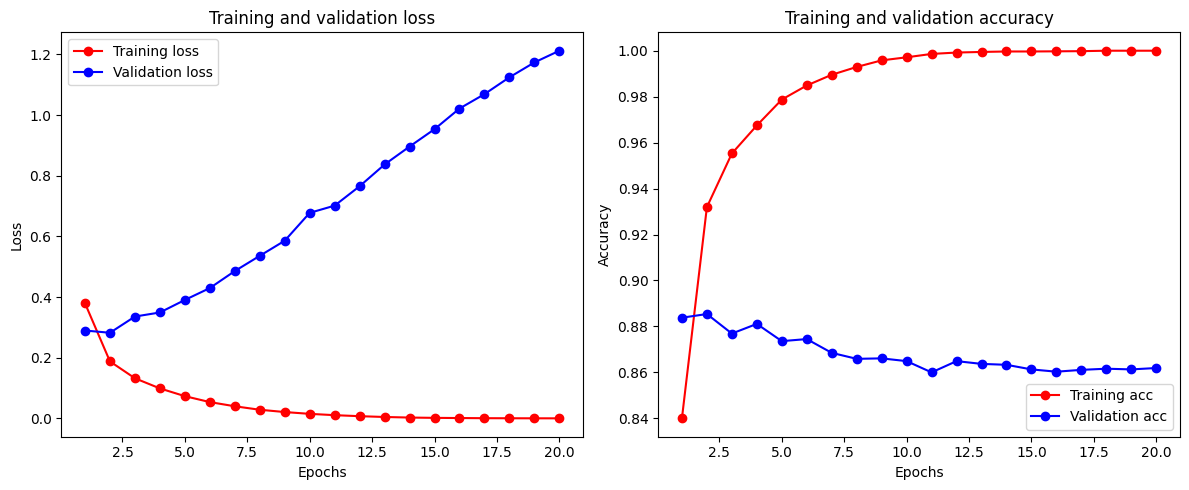

        Model  Layers  Units      LR  Momentum    L1    L2 Dropout  \
0  sequential       2      4  0.0005       0.9  None  None    None   

   Min.V.Loss  Max.V.Acc  
0    0.282523     0.8854  


In [ ]:
# Define model
model = tf.keras.models.Sequential([
tf.keras.layers.Dense(4, activation='relu', input_shape=(10000,)),
tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile model
model.compile(optimizer=optimizers.RMSprop(learning_rate=0.0005, momentum=0.9),
              loss=losses.binary_crossentropy,
              metrics=['accuracy'])

# Train model and store history
history = train_and_save_history(model, partial_x_train, partial_y_train, x_val, y_val, 20, 256, all_histories)

# Evaluate model performance
results = model.evaluate(x_test, y_test)
print(f"Test Loss: {results[0]}, Test Accuracy: {results[1]}")

# Plot both training and validation loss and accuracy of the last training
plot_history(all_histories[-1])

df = generate_performance_dataframe(model, history)
print(df)

clean_mem()

In [ ]:
# Define model
model = tf.keras.models.Sequential([
tf.keras.layers.Dense(4, activation='relu', input_shape=(10000,), kernel_regularizer=regularizers.l2(0.00001)),
tf.keras.layers.Dropout(0.05),
tf.keras.layers.Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l1_l2(l1=0.00001, l2=0.00001))
])

# Compile model
model.compile(optimizer=optimizers.RMSprop(learning_rate=0.0005),
              loss=losses.binary_crossentropy,
              metrics=['accuracy'])

# Train model and store history
history = train_and_save_history(model, partial_x_train, partial_y_train, x_val, y_val, 20, 256, all_histories)

# Evaluate model performance
results = model.evaluate(x_test, y_test)
print(f"Test Loss: {results[0]}, Test Accuracy: {results[1]}")

# Plot both training and validation loss and accuracy of the last training
plot_history(all_histories[-1])

df = generate_performance_dataframe(model, history)
print(df)

clean_mem()

## Model_4-10_momentum(0.5)

Epoch 1/20
59/59 [==============================] - 3s 34ms/step - loss: 0.5304 - accuracy: 0.7709 - val_loss: 0.4121 - val_accuracy: 0.8671
Epoch 2/20
59/59 [==============================] - 1s 18ms/step - loss: 0.3536 - accuracy: 0.8791 - val_loss: 0.3335 - val_accuracy: 0.8835
Epoch 3/20
59/59 [==============================] - 2s 28ms/step - loss: 0.2871 - accuracy: 0.8998 - val_loss: 0.3045 - val_accuracy: 0.8882
Epoch 4/20
59/59 [==============================] - 2s 28ms/step - loss: 0.2468 - accuracy: 0.9141 - val_loss: 0.2895 - val_accuracy: 0.8893
Epoch 5/20
59/59 [==============================] - 1s 21ms/step - loss: 0.2167 - accuracy: 0.9256 - val_loss: 0.2792 - val_accuracy: 0.8896
Epoch 6/20
59/59 [==============================] - 1s 17ms/step - loss: 0.1939 - accuracy: 0.9372 - val_loss: 0.2779 - val_accuracy: 0.8888
Epoch 7/20
59/59 [==============================] - 1s 18ms/step - loss: 0.1755 - accuracy: 0.9446 - val_loss: 0.2770 - val_accuracy: 0.8897
Epoch 8/20
59

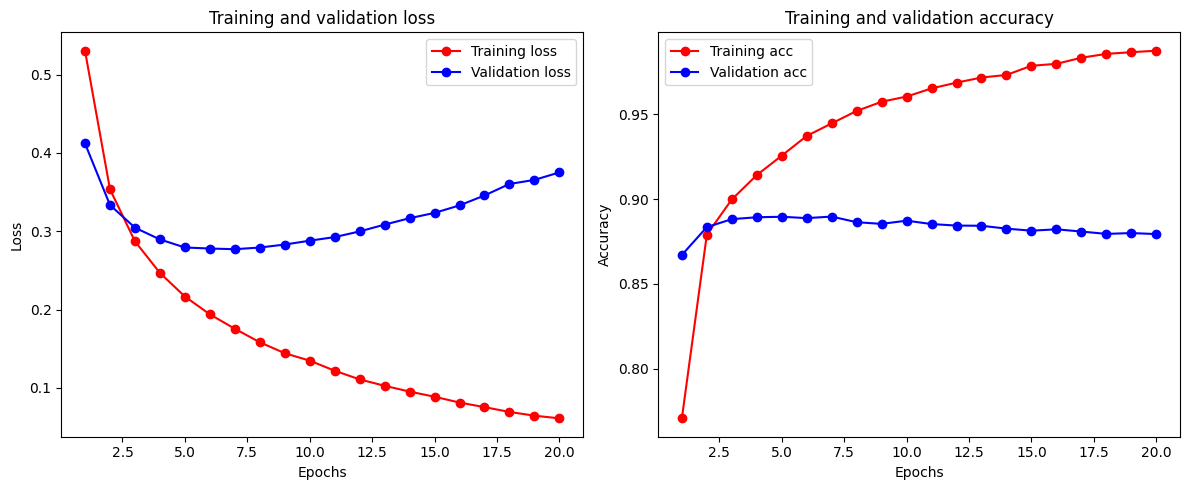

        Model  Layers  Units      LR  Momentum       L1       L2  Dropout  \
0  sequential       3      4  0.0005       0.5  0.00001  0.00001     0.05   

   Min.V.Loss  Max.V.Acc  
0    0.277045     0.8897  


In [ ]:
# Define model
model = tf.keras.models.Sequential([
tf.keras.layers.Dense(4, activation='relu', input_shape=(10000,), kernel_regularizer=regularizers.l2(0.00001)),
tf.keras.layers.Dropout(0.05),
tf.keras.layers.Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l1_l2(l1=0.00001, l2=0.00001))
])

# Compile model
model.compile(optimizer=optimizers.RMSprop(learning_rate=0.0005, momentum=0.5),
              loss=losses.binary_crossentropy,
              metrics=['accuracy'])

# Train model and store history
history = train_and_save_history(model, partial_x_train, partial_y_train, x_val, y_val, 20, 256, all_histories)

# Evaluate model performance
results = model.evaluate(x_test, y_test)
print(f"Test Loss: {results[0]}, Test Accuracy: {results[1]}")

# Plot both training and validation loss and accuracy of the last training
plot_history(all_histories[-1])

df = generate_performance_dataframe(model, history)
print(df)

clean_mem()



---

# Adam summary:  
### (Manual edit content, reference from ChatGPT Plugins)
The Adam optimizer adjusts the learning rate of each parameter based on the moving average of the square of the gradient of each parameter. This means it provides a custom learning rate for each parameter, making the optimization process more efficient and effective. Furthermore, due to its adaptive learning rate feature, Adam performs well on many different types of deep learning models and different data sets, especially in applications with large data sets and high-dimensional spaces. While compared to other optimization algorithms, Adam is less sensitive to the choice of initial learning rate and other hyperparameters, which makes it easier to configure in practice. However, overfitting still happened and it happened in early epoch.

## Model_04_Adam

Epoch 1/20
59/59 [==============================] - 3s 47ms/step - loss: 0.5825 - accuracy: 0.7481 - val_loss: 0.4725 - val_accuracy: 0.8465
Epoch 2/20
59/59 [==============================] - 2s 28ms/step - loss: 0.3875 - accuracy: 0.8877 - val_loss: 0.3681 - val_accuracy: 0.8710
Epoch 3/20
59/59 [==============================] - 1s 19ms/step - loss: 0.2954 - accuracy: 0.9147 - val_loss: 0.3184 - val_accuracy: 0.8848
Epoch 4/20
59/59 [==============================] - 1s 18ms/step - loss: 0.2436 - accuracy: 0.9287 - val_loss: 0.2959 - val_accuracy: 0.8896
Epoch 5/20
59/59 [==============================] - 1s 17ms/step - loss: 0.2076 - accuracy: 0.9406 - val_loss: 0.2836 - val_accuracy: 0.8899
Epoch 6/20
59/59 [==============================] - 1s 18ms/step - loss: 0.1815 - accuracy: 0.9481 - val_loss: 0.2792 - val_accuracy: 0.8902
Epoch 7/20
59/59 [==============================] - 1s 18ms/step - loss: 0.1603 - accuracy: 0.9558 - val_loss: 0.2760 - val_accuracy: 0.8909
Epoch 8/20
59

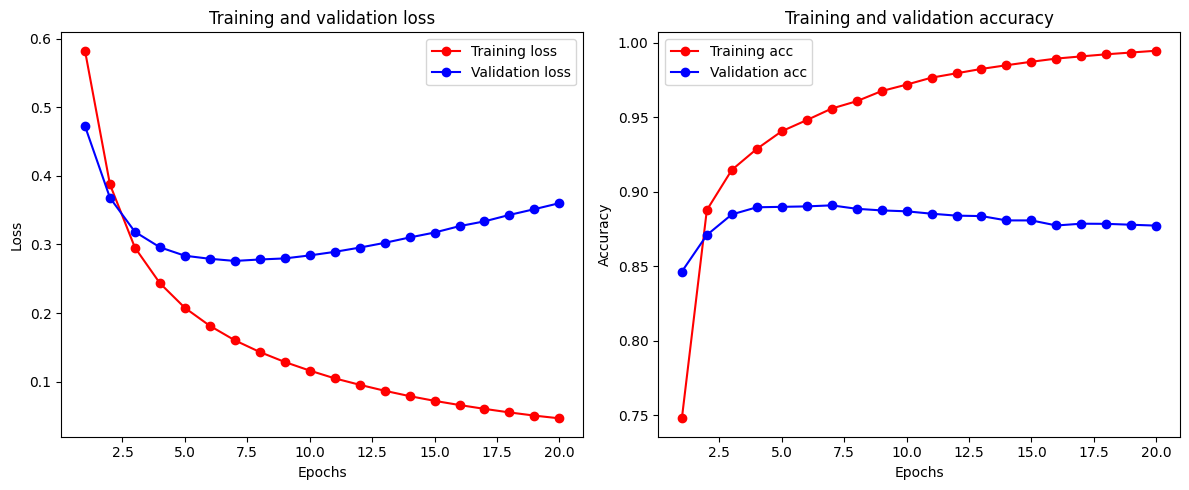

        Model  Layers  Units     LR Momentum    L1    L2 Dropout  Min.V.Loss  \
0  sequential       2      4  0.001     None  None  None    None    0.276015   

   Max.V.Acc  
0     0.8909  


In [ ]:
# Define model
model = tf.keras.models.Sequential([
tf.keras.layers.Dense(4, activation='relu', input_shape=(10000,)),
tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile model
model.compile(optimizer='adam',
              loss=losses.binary_crossentropy,
              metrics=['accuracy'])

# Train model and store history
history = train_and_save_history(model, partial_x_train, partial_y_train, x_val, y_val, 20, 256, all_histories)

# Evaluate model performance
results = model.evaluate(x_test, y_test)
print(f"Test Loss: {results[0]}, Test Accuracy: {results[1]}")

# Plot both training and validation loss and accuracy of the last training
plot_history(all_histories[-1])

df = generate_performance_dataframe(model, history)
print(df)

clean_mem()

## Model_04-10_Adam

Epoch 1/20
59/59 [==============================] - 3s 41ms/step - loss: 0.5313 - accuracy: 0.7815 - val_loss: 0.4174 - val_accuracy: 0.8622
Epoch 2/20
59/59 [==============================] - 1s 18ms/step - loss: 0.3514 - accuracy: 0.8829 - val_loss: 0.3421 - val_accuracy: 0.8786
Epoch 3/20
59/59 [==============================] - 1s 17ms/step - loss: 0.2807 - accuracy: 0.9085 - val_loss: 0.3057 - val_accuracy: 0.8894
Epoch 4/20
59/59 [==============================] - 1s 18ms/step - loss: 0.2389 - accuracy: 0.9238 - val_loss: 0.2899 - val_accuracy: 0.8904
Epoch 5/20
59/59 [==============================] - 2s 26ms/step - loss: 0.2077 - accuracy: 0.9347 - val_loss: 0.2802 - val_accuracy: 0.8914
Epoch 6/20
59/59 [==============================] - 2s 26ms/step - loss: 0.1832 - accuracy: 0.9427 - val_loss: 0.2770 - val_accuracy: 0.8900
Epoch 7/20
59/59 [==============================] - 2s 30ms/step - loss: 0.1634 - accuracy: 0.9505 - val_loss: 0.2753 - val_accuracy: 0.8899
Epoch 8/20
59

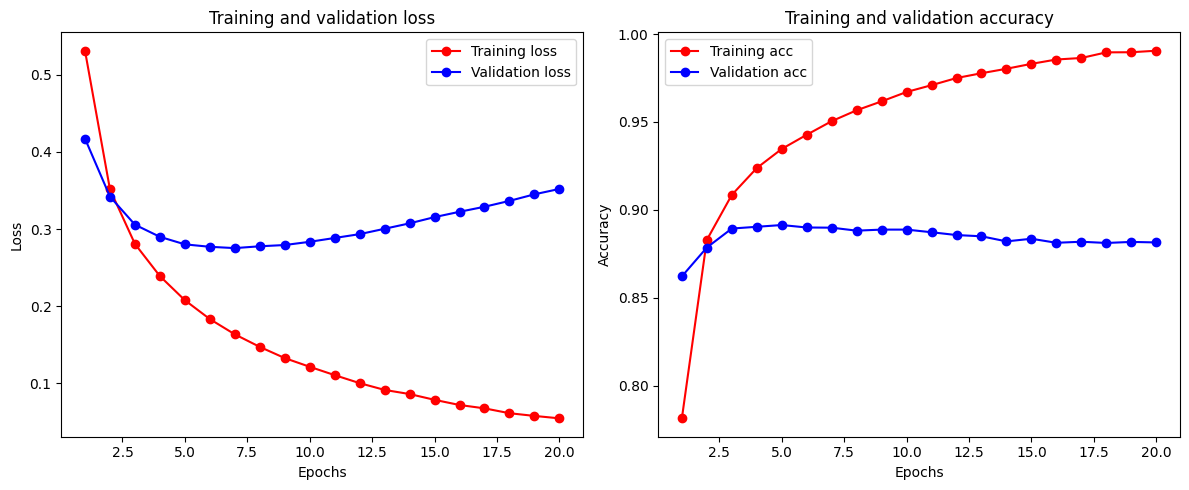

          Model  Layers  Units     LR Momentum       L1       L2  Dropout  \
0  sequential_1       3      4  0.001     None  0.00001  0.00001     0.05   

   Min.V.Loss  Max.V.Acc  
0    0.275276     0.8914  


In [ ]:
# Define model
model = tf.keras.models.Sequential([
tf.keras.layers.Dense(4, activation='relu', input_shape=(10000,), kernel_regularizer=regularizers.l2(0.00001)),
tf.keras.layers.Dropout(0.05),
tf.keras.layers.Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l1_l2(l1=0.00001, l2=0.00001))
])

# Compile model
model.compile(optimizer='adam',
              loss=losses.binary_crossentropy,
              metrics=['accuracy'])

# Train model and store history
history = train_and_save_history(model, partial_x_train, partial_y_train, x_val, y_val, 20, 256, all_histories)

# Evaluate model performance
results = model.evaluate(x_test, y_test)
print(f"Test Loss: {results[0]}, Test Accuracy: {results[1]}")

# Plot both training and validation loss and accuracy of the last training
plot_history(all_histories[-1])

df = generate_performance_dataframe(model, history)
print(df)

clean_mem()

# Summary of further challenges against overfitting:  
Unfortunately, after our hard trying, both overfitting and overall model performance weren't improved in any way. We can basically conclude that for a simple network model, learning accounts for an outstanding role.  

Therefore, in order to see how those hyperparameters affect the performance, we are further testing on more layers and units. Based on Model_4-10, since Adam is a popular optimizer in deep learning and it combines Momentum and RMSprop stochastic gradient descent methods, we change the optimizer from RMSProp to Adam.



---



---



# Model_4-10_Adam_01  

layer=4(new)  
epochs=20  
batch_size=256  
optimizer=adam(new)  
hidden layer activation=relu(new)  



Epoch 1/20
59/59 [==============================] - 3s 34ms/step - loss: 0.6446 - accuracy: 0.6215 - val_loss: 0.5880 - val_accuracy: 0.7371
Epoch 2/20
59/59 [==============================] - 1s 16ms/step - loss: 0.5299 - accuracy: 0.8066 - val_loss: 0.5123 - val_accuracy: 0.8038
Epoch 3/20
59/59 [==============================] - 1s 18ms/step - loss: 0.4562 - accuracy: 0.8763 - val_loss: 0.4692 - val_accuracy: 0.8562
Epoch 4/20
59/59 [==============================] - 1s 17ms/step - loss: 0.4084 - accuracy: 0.9138 - val_loss: 0.4457 - val_accuracy: 0.8672
Epoch 5/20
59/59 [==============================] - 1s 24ms/step - loss: 0.3720 - accuracy: 0.9342 - val_loss: 0.4348 - val_accuracy: 0.8660
Epoch 6/20
59/59 [==============================] - 2s 28ms/step - loss: 0.3421 - accuracy: 0.9473 - val_loss: 0.4212 - val_accuracy: 0.8748
Epoch 7/20
59/59 [==============================] - 1s 24ms/step - loss: 0.3167 - accuracy: 0.9569 - val_loss: 0.4220 - val_accuracy: 0.8697
Epoch 8/20
59

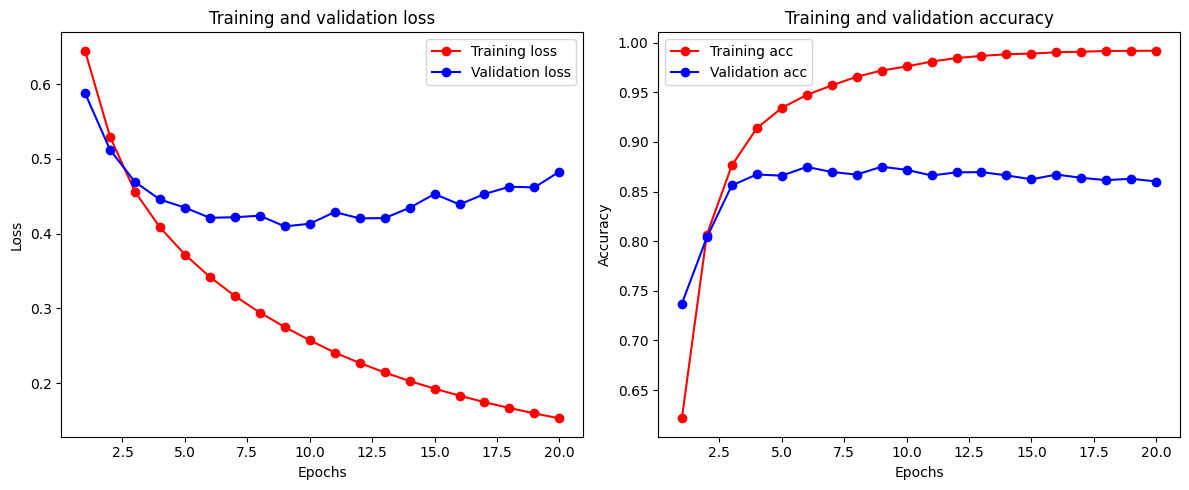

        Model  Layers  Units     LR Momentum    L1    L2 Dropout  Min.V.Loss  \
0  sequential       3      4  0.001     None  None  None    None    0.409736   

   Max.V.Acc  
0      0.875  


In [ ]:
# Define model
model = tf.keras.models.Sequential([
tf.keras.layers.Dense(4, activation='relu', input_shape=(10000,)),
tf.keras.layers.Dense(4, activation='relu',),
tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile model
model.compile(optimizer='adam',
              loss=losses.binary_crossentropy,
              metrics=['accuracy'])

# Train model and store history
history = train_and_save_history(model, partial_x_train, partial_y_train, x_val, y_val, 20, 256, all_histories)

# Evaluate model performance
results = model.evaluate(x_test, y_test)
print(f"Test Loss: {results[0]}, Test Accuracy: {results[1]}")

# Plot both training and validation loss and accuracy of the last training
plot_history(all_histories[-1])

df = generate_performance_dataframe(model, history)
print(df)

clean_mem()

# Model_4-10_Adam_02  

layer=4(new)  
epochs=20  
batch_size=256  
optimizer=adam(new)  
hidden layer activation=tanh(new)  

Epoch 1/20
59/59 [==============================] - 3s 35ms/step - loss: 0.6183 - accuracy: 0.7729 - val_loss: 0.5450 - val_accuracy: 0.8513
Epoch 2/20
59/59 [==============================] - 2s 28ms/step - loss: 0.4725 - accuracy: 0.8869 - val_loss: 0.4362 - val_accuracy: 0.8712
Epoch 3/20
59/59 [==============================] - 1s 20ms/step - loss: 0.3642 - accuracy: 0.9114 - val_loss: 0.3610 - val_accuracy: 0.8873
Epoch 4/20
59/59 [==============================] - 1s 19ms/step - loss: 0.2870 - accuracy: 0.9294 - val_loss: 0.3172 - val_accuracy: 0.8928
Epoch 5/20
59/59 [==============================] - 2s 28ms/step - loss: 0.2309 - accuracy: 0.9445 - val_loss: 0.2946 - val_accuracy: 0.8916
Epoch 6/20
59/59 [==============================] - 2s 29ms/step - loss: 0.1901 - accuracy: 0.9573 - val_loss: 0.2833 - val_accuracy: 0.8910
Epoch 7/20
59/59 [==============================] - 1s 19ms/step - loss: 0.1591 - accuracy: 0.9658 - val_loss: 0.2803 - val_accuracy: 0.8874
Epoch 8/20
59

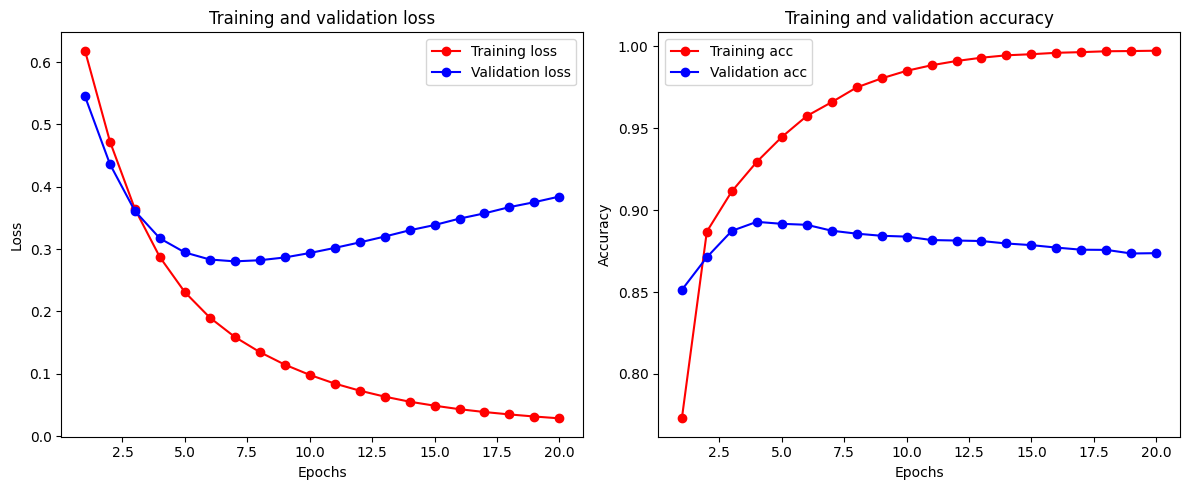

        Model  Layers  Units     LR Momentum    L1    L2 Dropout  Min.V.Loss  \
0  sequential       3      4  0.001     None  None  None    None    0.280332   

   Max.V.Acc  
0     0.8928  


In [ ]:
# Define model
model = tf.keras.models.Sequential([
tf.keras.layers.Dense(4, activation='relu', input_shape=(10000,)),
tf.keras.layers.Dense(4, activation='tanh'),
tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile model
model.compile(optimizer='adam',
              loss=losses.binary_crossentropy,
              metrics=['accuracy'])

# Train model and store history
history = train_and_save_history(model, partial_x_train, partial_y_train, x_val, y_val, 20, 256, all_histories)

# Evaluate model performance
results = model.evaluate(x_test, y_test)
print(f"Test Loss: {results[0]}, Test Accuracy: {results[1]}")

# Plot both training and validation loss and accuracy of the last training
plot_history(all_histories[-1])

df = generate_performance_dataframe(model, history)
print(df)

clean_mem()

# Model_4-10_Adam_02 Summary:  
Reaching the highest validation accuracy of 0.8928, but the loss is quite high.




---


---



Try and think about how you would go about automating hyperparameter search (= making your life easier, so that the search is done by a system rather than manually)  

We try "Grid Search" here, but we find there are some best practice in Ch.13 of DLWP. Grid Search could be a solution, but it depends on the memory on the running device. Now we can have a concept about why memory administration is important and how important it is - we are not machines, we are human beings.

# Model_4-10_Adam_03_Grid Search  
### Codes generate by ChatGPT(ver. Plugins)
### prompt: given Model_4, ask GPT give the code of grid search

fixed:  
batch_sizes = [256]  
learning_rates = [0.0005]  
epoch=10

grid search in:
layer=4(new)  
optimizer=adam(new)  
hidden layer activation=tanh(new)  
l2_regs = [0.001, 0.0001]

In [11]:
# idea comes from Jérémie walk through about IMDB dataset, so I ask ChatGPT Plugins if there's any automation test for machine learning
# codes are generated by ChatGPT Plugins, 15/11
# prompt: copy and past one of the model code and ask it to generate grid search for machine learning
# it originally defined batch sizes as 64, 128, 256, 512, and 1024, learning reate 0.01-0.0001, but I manually change the batch sizes(the colab memory limit) and learning rates(proven 0.0005 is the best)

# Define grid
batch_sizes = [256]
learning_rates = [0.0005]
l2_regs = [0.001, 0.0001]

# Save the best models and performance
best_accuracy = 0
best_params = {}

# Loop grid search
for batch_size in batch_sizes:
    for lr in learning_rates:
        for l2_reg in l2_regs:
            print(f"Training with batch size: {batch_size}, learning rate: {lr}, L2 regularization: {l2_reg}")

            # Define model
            model = tf.keras.models.Sequential([
                tf.keras.layers.Dense(4, activation='relu', input_shape=(10000,), kernel_regularizer=regularizers.l2(l2_reg)),
                tf.keras.layers.Dense(4, activation='tanh', kernel_regularizer=regularizers.l2(l2_reg)),
                tf.keras.layers.Dense(1, activation='sigmoid')
            ])

            # Compile model
            optimizer = optimizers.Adam(learning_rate=lr)
            model.compile(optimizer=optimizer,
                          loss=losses.binary_crossentropy,
                          metrics=['accuracy'])

            # Train model and store history
            history = model.fit(partial_x_train, partial_y_train,
                                epochs=10,
                                batch_size=batch_size,
                                validation_data=(x_val, y_val))

            # Evaluate model performance
            results = model.evaluate(x_test, y_test)
            print(f"Test Loss: {results[0]}, Test Accuracy: {results[1]}")

            # Update best model
            if results[1] > best_accuracy:
                best_accuracy = results[1]
                best_params = {'batch_size': batch_size, 'learning_rate': lr, 'l2_reg': l2_reg}

            # Clean memory
            tf.keras.backend.clear_session()

print(f"Best Accuracy: {best_accuracy}")
print(f"Best Parameters: {best_params}")

Training with batch size: 256, learning rate: 0.0005, L2 regularization: 0.001
Epoch 1/10
59/59 [==============================] - 4s 45ms/step - loss: 0.6248 - accuracy: 0.7362 - val_loss: 0.5462 - val_accuracy: 0.8300
Epoch 2/10
59/59 [==============================] - 2s 28ms/step - loss: 0.4757 - accuracy: 0.8689 - val_loss: 0.4449 - val_accuracy: 0.8647
Epoch 3/10
59/59 [==============================] - 1s 20ms/step - loss: 0.3851 - accuracy: 0.8991 - val_loss: 0.3886 - val_accuracy: 0.8762
Epoch 4/10
59/59 [==============================] - 1s 18ms/step - loss: 0.3307 - accuracy: 0.9142 - val_loss: 0.3580 - val_accuracy: 0.8828
Epoch 5/10
59/59 [==============================] - 1s 17ms/step - loss: 0.2940 - accuracy: 0.9274 - val_loss: 0.3399 - val_accuracy: 0.8862
Epoch 6/10
59/59 [==============================] - 1s 17ms/step - loss: 0.2680 - accuracy: 0.9364 - val_loss: 0.3300 - val_accuracy: 0.8874
Epoch 7/10
59/59 [==============================] - 1s 18ms/step - loss: 0.

# 12. References  
1. Chollet F., 2021, Ch.1-6, Deep Learning with Python, Second Edition, Manning
2. Wenger J., Week1-5, 2023-2024, Lecture and Lab materials, IS53024B/S/IS71039B/A: ARTIFICIAL INTELLIGENCE (2023-24), Goldsmiths, UoL
3. ChatGPT Plugins, 6/11-15/11, 2023
4. Pykes K., 2023, Fighting Overfitting With L1 or L2 Regularization: Which One Is Better? Asseciable: https://neptune.ai/blog/fighting-overfitting-with-l1-or-l2-regularization#:~:text=L1%20regularization%20is%20more%20robust,the%20cost%20only%20increases%20linearly.